In [1]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from scripts import aesthetics

aesthetics.activate_paper_rcParams()

# Examine category hierarchy results

In this notebook, we'll begin the primary analysis of parsing through the CWAS results. This analysis needs to account for the fact that the categories themselves are hierarchical.

I'm going to concatenate all this data so that I'm only dealing with a few files. Focusing on neuroblastoma.

In [2]:
###########
### SVs ###
###########
nbl_coding_svs = pd.read_csv(
    "data/CWAS data for Jett/List of variants by category for each CWAS analysis/neuroblastoma_all_coding_SVs_in_each_category_list_combined_11_3_23.txt",
    sep="\t",
)

nbl_noncoding_svs = pd.read_csv('data/CWAS data for Jett/List of variants by category for each CWAS analysis/neuroblastoma_all_noncoding_SVs_in_each_category_list_combined_BURDEN_TESTING_with_col_names_11_3_23.txt', sep='\t')
nbl_noncoding_svs = nbl_noncoding_svs.rename(columns = {'emd': 'end'})

# combine the SVs
nbl_coding_svs['sv_category'] = 'coding'
nbl_noncoding_svs['sv_category'] = 'non-coding'

nbl_category_svs = pd.concat([nbl_coding_svs, nbl_noncoding_svs])
nbl_category_svs.head(2)

SV chrom     start       end  \
0   PedSV.2.5.2_DUP_chr1_794  chr1  19221626  19301822   
1  PedSV.2.5.2_DUP_chr1_1379  chr1  44731601  44792024   

                                            category sv_category  
0  DUP.RARE.PREDICTED_COPY_GAIN.lof_constrained.e...      coding  
1  DUP.RARE.PREDICTED_COPY_GAIN.lof_constrained.e...      coding

In [5]:
#########################
### FRAMEWORK RESULTS ###
#########################
nbl_singleton_coding_framework_results = pd.read_csv(
    "data/CWAS data for Jett/CWAS sum stats/neuroblastoma_all_coding_cwas_concatenated_glm_results_SINGLETON_11_3_23.txt",
    sep="\t",
)
nbl_singleton_coding_framework_results[['af_category', 'sv_category']] = ['singleton', 'coding']

nbl_rare_coding_framework_results = pd.read_csv(
    "data/CWAS data for Jett/CWAS sum stats/neuroblastoma_all_coding_cwas_concatenated_glm_results_RARE_11_3_23.txt",
    sep="\t",
)
nbl_rare_coding_framework_results[['af_category', 'sv_category']] = ['rare', 'coding']

nbl_singleton_noncoding_framework_results = pd.read_csv(
    "data/CWAS data for Jett/CWAS sum stats/neuroblastoma_all_noncoding_cwas_concatenated_glm_results_SINGLETON_11_3_23.txt",
    sep="\t",
)
nbl_singleton_noncoding_framework_results[['af_category', 'sv_category']] = ['singleton', 'non-coding']

nbl_rare_noncoding_framework_results = pd.read_csv(
    "data/CWAS data for Jett/CWAS sum stats/neuroblastoma_all_noncoding_cwas_concatenated_glm_results_RARE_11_3_23.txt",
    sep="\t",
)
nbl_rare_noncoding_framework_results[['af_category', 'sv_category']] = ['rare', 'non-coding']

nbl_framework_results = pd.concat([nbl_singleton_coding_framework_results, nbl_rare_coding_framework_results, 
                                   nbl_singleton_noncoding_framework_results, nbl_rare_noncoding_framework_results])

In [6]:
nbl_framework_results.head(2)

point_estimate  std_error   z_score       p_value  SV_counts_cases  \
0        0.271918   0.051227  5.308100  1.110000e-07              438   
1        0.276065   0.054006  5.111756  3.190000e-07              393   

   SV_counts_cases_max  number_of_cases_with_zero_SVs  total_cases  \
0                    5                            336          646   
1                    5                            356          646   

   SV_counts_controls  SV_counts_controls_max  ...  number_of_unique_SVs  \
0                2441                       4  ...                   459   
1                2172                       4  ...                   411   

                                       category_name  sv_type  frequency  \
0  ANY.SINGLETON.PREDICTED_LOF_or_PREDICTED_PARTI...      ANY  SINGLETON   
1           DEL.SINGLETON.ANY.ANY.ANY.protein_coding      DEL  SINGLETON   

  mean_SVs_per_case mean_SVs_per_control  mean_SVs_total  \
0          0.678019             0.519362        0.538533   
1          0.608359             0.462128        0.479798   

   negative_log10_p_value  af_category  sv_category  
0                6.955563    singleton       coding  
1                6.495968    singleton       coding  

[2 rows x 22 columns]

In [7]:
nbl_coding_framework = pd.read_csv(
    "data/CWAS data for Jett/CWAS frameworks/CWAS_categories_neuroblastoma_coding_8_17_23.txt",
    sep="\t",
)

nbl_noncoding_framework = pd.read_csv(
    "data/CWAS data for Jett/CWAS frameworks/CWAS_rare_categories_neuroblastoma_noncoding_10_2_23.txt",
    sep="\t",
)

In [8]:
nbl_coding_framework

sv_type  frequency                           genic_relationship  \
0          DUP       RARE                          PREDICTED_COPY_GAIN   
1          DEL  SINGLETON                PREDICTED_INTRAGENIC_EXON_DUP   
2   CPX_or_INV        NaN  PREDICTED_LOF_or_PREDICTED_PARTIAL_EXON_DUP   
3      INS_ALL        NaN                                          ANY   
4          ANY        NaN                                          NaN   
5          NaN        NaN                                          NaN   
6          NaN        NaN                                          NaN   
7          NaN        NaN                                          NaN   
8          NaN        NaN                                          NaN   
9          NaN        NaN                                          NaN   
10         NaN        NaN                                          NaN   
11         NaN        NaN                                          NaN   
12         NaN        NaN                                          NaN   
13         NaN        NaN                                          NaN   
14         NaN        NaN                                          NaN   

              constraint                  expression  \
0        lof_constrained  expressed_in_adrenal_gland   
1   missense_constrained                         ANY   
2          unconstrained                         NaN   
3                    ANY                         NaN   
4                    NaN                         NaN   
5                    NaN                         NaN   
6                    NaN                         NaN   
7                    NaN                         NaN   
8                    NaN                         NaN   
9                    NaN                         NaN   
10                   NaN                         NaN   
11                   NaN                         NaN   
12                   NaN                         NaN   
13                   NaN                         NaN   
14                   NaN                         NaN   

                                           gene_group  
0                                      protein_coding  
1                                 cosmic_cancer_genes  
2                                       germline_CPGs  
3                          base_excision_repair_genes  
4                        chromatin_organization_genes  
5                             dna_damage_bypass_genes  
6                           dna_damage_reversal_genes  
7                                dna_DSB_repair_genes  
8                              dna_DSB_response_genes  
9                                    dna_repair_genes  
10                                      fanconi_genes  
11                              mismatch_repair_genes  
12                   nucleotide_excision_repair_genes  
13                     oncogenic_MAPK_signaling_genes  
14  signaling_transduction_by_receptor_tyrosine_ki...

In [9]:
nbl_noncoding_framework

sv_type  frequency         functional_intersection  \
0          DUP       RARE  PREDICTED_NONCODING_BREAKPOINT   
1          DEL  SINGLETON        PREDICTED_NONCODING_SPAN   
2   CPX_or_INV        NaN                             ANY   
3      INS_ALL        NaN                             NaN   
4          ANY        NaN                             NaN   
5          NaN        NaN                             NaN   
6          NaN        NaN                             NaN   
7          NaN        NaN                             NaN   
8          NaN        NaN                             NaN   
9          NaN        NaN                             NaN   
10         NaN        NaN                             NaN   
11         NaN        NaN                             NaN   
12         NaN        NaN                             NaN   
13         NaN        NaN                             NaN   
14         NaN        NaN                             NaN   
15         NaN        NaN                             NaN   
16         NaN        NaN                             NaN   
17         NaN        NaN                             NaN   
18         NaN        NaN                             NaN   
19         NaN        NaN                             NaN   
20         NaN        NaN                             NaN   
21         NaN        NaN                             NaN   

                                  functional_category    genic_relationship  \
0                            neuroblastoma_atac_peaks  PREDICTED_INTERGENIC   
1                        neuroblastoma_chromHMM15_Enh    PREDICTED_INTRONIC   
2              neuroblastoma_chromHMM15_Enh_conserved    PREDICTED_PROMOTER   
3                       neuroblastoma_chromHMM15_EnhG         PREDICTED_UTR   
4             neuroblastoma_chromHMM15_EnhG_conserved                   ANY   
5                          neuroblastoma_H3K27Ac_peak                   NaN   
6                   neuroblastoma_chromHMM15_TssAFlnk                   NaN   
7                      neuroblastoma_ABC_MAX_enhancer                   NaN   
8                  neuroblastoma_atac_peaks_conserved                   NaN   
9                     neuroblastoma_chromHMM15_EnhBiv                   NaN   
10          neuroblastoma_chromHMM15_EnhBiv_conserved                   NaN   
11               neuroblastoma_H3K27Ac_peak_conserved                   NaN   
12           neuroblastoma_encode_consensus_enhancers                   NaN   
13  neuroblastoma_encode_consensus_enhancers_conse...                   NaN   
14           neuroblastoma_ABC_MAX_enhancer_conserved                   NaN   
15                         neuroblastoma_tad_boundary                   NaN   
16        neuroblastoma_chromHMM15_TssAFlnk_conserved                   NaN   
17               neuroblastoma_tad_boundary_conserved                   NaN   
18                              recombination_hotspot                   NaN   
19                    recombination_hotspot_conserved                   NaN   
20                                               UCNE                   NaN   
21                                       fragile_site                   NaN   

         constraint                  expression                gene_group  
0   lof_constrained  expressed_in_adrenal_gland            protein_coding  
1               ANY                         ANY  cosmic_and_germline_CPGs  
2               NaN                         NaN                       NaN  
3               NaN                         NaN                       NaN  
4               NaN                         NaN                       NaN  
5               NaN                         NaN                       NaN  
6               NaN                         NaN                       NaN  
7               NaN                         NaN                       NaN  
8               NaN                         NaN                       NaN  
9               NaN      

# Examine hierarchy structure

The point here is as follows--there are 10 significant coding categories, and 67 significant non-coding categories.

I want to know how all these categories relate to each other. We can use the jaccard distance to do this.

In [6]:
nbl_analysis_categories = nbl_framework_results.query('negative_log10_p_value > 3.5')
nbl_analysis_categories.groupby(['sv_category']).size()

sv_category
coding        10
non-coding    67
dtype: int64

In [7]:
nbl_analysis_category_names = nbl_analysis_categories['category_name'].tolist()

In [8]:
nbl_category_svs['value'] = 1
data = nbl_category_svs[nbl_category_svs['category'].isin(nbl_analysis_category_names)]
data = data.pivot(columns = 'SV', index = 'category', values = 'value').fillna(0)
data_values = data.values.astype(bool)

In [9]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, leaves_list

In [10]:
j_dist = pdist(data_values, metric='jaccard')
j_dist = 1 - squareform(j_dist)

Z = linkage(j_dist, method='average')
ordered_indices = leaves_list(Z)
j_dist = j_dist[ordered_indices, :][:, ordered_indices]
j_dist = pd.DataFrame(j_dist, index = data.index[ordered_indices], columns = data.index[ordered_indices])

In [11]:
labels = {'TAD boundary': [17, 8],
          'H3K27Ac peak': [23, 19],
          'Coding SVs': [33, 27],
          'chromHMM15_EnhBiv': [37, 34],
          'TAD boundary | CPGs': [39, 37],
          'ABC max enhancer | promoter | adrenal': [42, 39.5],
          'recombination hotspot | CPGs': [46, 43],
          'ABC max enhancer': [52, 48],
          'ATAC peaks conserved': [57, 53.5],
          'ATAC peaks': [60, 57.5],
          '? mix': [66, 62]}

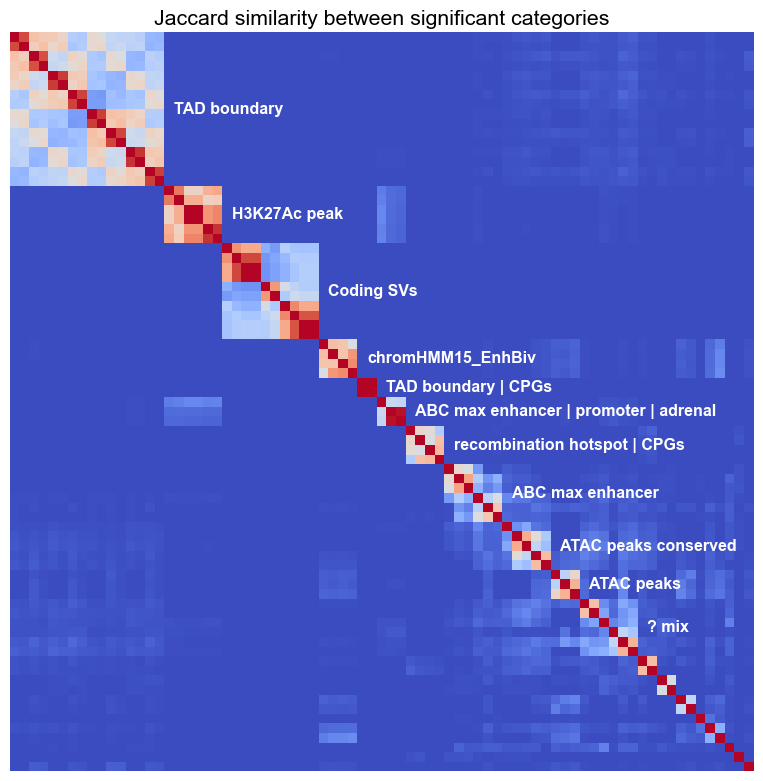

In [12]:
fig, ax = plt.subplots(1, figsize = (10, 10))
sns.heatmap(j_dist, annot=False, cmap='coolwarm', cbar = False)
aesthetics.strip_axis(ax = ax)

for cat, loc in labels.items():
    ax.text(s = cat, x = loc[0], y = loc[1], fontsize = 12, color = 'white', fontweight = 'bold', va = 'center')

ax.set_title('Jaccard similarity between significant categories', fontsize = 16)
fig.savefig('data/cwas-results/jaccard-similarity-between-categories.png', bbox_inches = 'tight')

# Examining an example--TAD boundary

In [289]:
tad_boundaries = data.index[ordered_indices][:16]

In [290]:
subcharacteristic_parents = {'sv_type': 'ANY',
                        'frequency': 'RARE',
                        'functional_intersection': 'ANY',
                        'functional_category': '',
                        'genic_relationship': 'ANY',
                        'constraint': 'ANY',
                        'expression': 'ANY',
                        'gene_group': ''}

In [291]:
def classify_relationship(cat_i, cat_j):
    cat_i_components = cat_i.split('.')
    cat_j_components = cat_j.split('.')
    
    # dicts are ordered in python 3.7
    subparents = []
    for cat, c_i, c_j in zip(subcharacteristic_parents.keys(), cat_i_components, cat_j_components):
        if c_i == subcharacteristic_parents[cat] or c_i == c_j:
            subparents.append(1)
        else:
            subparents.append(0)
    
    return np.all(subparents)

In [292]:
import networkx as nx

In [293]:
# 1 if row is parent of column. Also make a graph concurrently.
parent_child = pd.DataFrame(0, index = tad_boundaries, columns = tad_boundaries)
dg = nx.DiGraph()

for i, cat_i in enumerate(tad_boundaries):
    for j, cat_j in enumerate(tad_boundaries):
        parent_rel = classify_relationship(cat_i, cat_j)
        parent_child.iloc[i, j] = parent_rel
        
        if parent_rel and cat_i != cat_j:
            dg.add_edge(cat_i, cat_j)
        
# do transitive reduction - ie removes "superparent" relationships
dg = nx.transitive_reduction(dg)

In [294]:
# next, we do some math on the tree to identify our node "levels"
overall_parent_node = [node for node in dg.nodes if dg.in_degree(node) == 0]
assert len(overall_parent_node) == 1

overall_parent_node = overall_parent_node[0]

# for each node, determine how far away it is from the overall parent
node_levels = {node: len(nx.shortest_path(dg, source = overall_parent_node, target = node)) - 1 for node in dg.nodes}
nx.set_node_attributes(dg, node_levels, 'level')

node_level_df = pd.DataFrame.from_dict(node_levels, orient = 'index', columns = ['level'])

# calculate some y values
num_depth = node_level_df['level'].value_counts()

yvals = []
for depth in range(node_level_df['level'].max() + 1):
    depth_y = np.arange(0, 1, 1 / num_depth.loc[depth])
    yvals += list(depth_y)
    
node_level_df['y'] = yvals
node_level_df['effect_size'] = nbl_framework_results.set_index('category_name').loc[list(node_level_df.index), 'point_estimate'].values

node_level_df = node_level_df.loc[list(dg.nodes)]

In [295]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib as mpl

In [296]:
# determine node positions
pos = graphviz_layout(dg, prog = 'dot', args='-Grankdir=LR')

# and determine node size
node_size = node_level_df['effect_size']

# make node colors
norm = mpl.colors.Normalize(vmin=round(node_size.min(), 1), vmax=round(node_size.max(), 1))
cmap = plt.cm.Reds
colors = [cmap(norm(val)) for val in node_size]

In [297]:
from matplotlib import cm

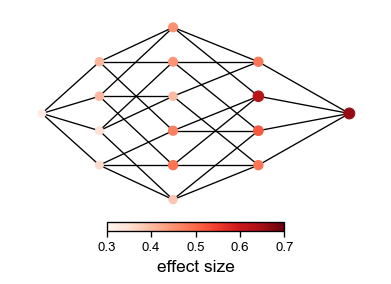

In [299]:
fig, ax = plt.subplots(1, figsize = (5, 3))
nx.draw(dg, with_labels=False, ax = ax, pos = pos, arrows = False, node_size = node_size * 100, node_color = colors)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='Reds'), ax=ax, fraction = 0.04, orientation = 'horizontal', pad = 0.02)
cbar.ax.set_xlabel('effect size')
fig.savefig('data/cwas-results/example-tad-boundary-effect-sizes.png', bbox_inches = 'tight')


# Coding effects

In [415]:
coding_categories = nbl_analysis_categories.query('sv_category == "coding" & negative_log10_p_value > 3.5')['category_name'].tolist()

In [419]:
coding_subcharacteristics = {'sv_type': 'ANY',
                        'frequency': 'RARE',
                        'genic_relationship': 'ANY',
                        'constraint': 'ANY',
                        'expression': 'ANY',
                        'gene_group': ''}

In [420]:
def classify_coding_relationship(cat_i, cat_j):
    cat_i_components = cat_i.split('.')
    cat_j_components = cat_j.split('.')
    
    # dicts are ordered in python 3.7
    subparents = []
    for cat, c_i, c_j in zip(coding_subcharacteristics.keys(), cat_i_components, cat_j_components):
        if c_i == coding_subcharacteristics[cat] or c_i == c_j:
            subparents.append(1)
        else:
            subparents.append(0)
    
    return np.all(subparents)

In [421]:
# 1 if row is parent of column. Also make a graph concurrently.
parent_child = pd.DataFrame(0, index = coding_categories, columns = coding_categories)
dg = nx.DiGraph()

for i, cat_i in enumerate(coding_categories):
    for j, cat_j in enumerate(coding_categories):
        parent_rel = classify_coding_relationship(cat_i, cat_j)
        parent_child.iloc[i, j] = parent_rel
        
        if parent_rel and cat_i != cat_j:
            dg.add_edge(cat_i, cat_j)
        
# do transitive reduction - ie removes "superparent" relationships
dg = nx.transitive_reduction(dg)

In [422]:
# next, we do some math on the tree to identify our node "levels"
overall_parent_node = [node for node in dg.nodes if dg.in_degree(node) == 0]
assert len(overall_parent_node) == 1

overall_parent_node = overall_parent_node[0]

# for each node, determine how far away it is from the overall parent
node_levels = {node: len(nx.shortest_path(dg, source = overall_parent_node, target = node)) - 1 for node in dg.nodes}
nx.set_node_attributes(dg, node_levels, 'level')

node_level_df = pd.DataFrame.from_dict(node_levels, orient = 'index', columns = ['level'])

# calculate some y values
num_depth = node_level_df['level'].value_counts()

yvals = []
for depth in range(node_level_df['level'].max() + 1):
    depth_y = np.arange(0, 1, 1 / num_depth.loc[depth])
    yvals += list(depth_y)
    
node_level_df['y'] = yvals
node_level_df['effect_size'] = nbl_framework_results.set_index('category_name').loc[list(node_level_df.index), 'point_estimate'].values

node_level_df = node_level_df.loc[list(dg.nodes)]

In [423]:
# determine node positions
pos = graphviz_layout(dg, prog = 'dot', args='-Grankdir=LR')

# and determine node size
node_size = node_level_df['effect_size']

# make node colors
norm = mpl.colors.Normalize(vmin=round(node_size.min(), 1), vmax=round(node_size.max(), 1))
cmap = plt.cm.Reds
colors = [cmap(norm(val)) for val in node_size]

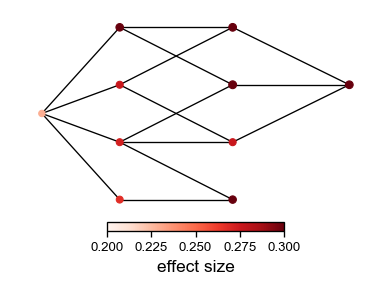

In [425]:
fig, ax = plt.subplots(1, figsize = (5, 3))
nx.draw(dg, with_labels=False, ax = ax, pos = pos, arrows = False, node_size = node_size * 100, node_color = colors)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap='Reds'), ax=ax, fraction = 0.04, orientation = 'horizontal', pad = 0.02)
cbar.ax.set_xlabel('effect size')
fig.savefig('data/cwas-results/example-coding-categories-effect-sizes.png', bbox_inches = 'tight')


In [429]:
node_level_df.query('level == 3')

level     y  effect_size
DEL.SINGLETON.PREDICTED_LOF_or_PREDICTED_PARTIA...      3  0.75     0.332592

# But what about all coding categories?

In [431]:
# tad_boundaries = nbl_framework_results[(nbl_framework_results['category_name'].str.contains('\.neuroblastoma_tad_boundary\.'))]['category_name'].tolist()
coding_results = nbl_framework_results.query('sv_category == "coding"').copy()
coding_results['gene_group'] = coding_results['category_name'].apply(lambda cat: cat.split('.')[-1])

In [436]:
norm = mpl.colors.Normalize(vmin=0, vmax=1)

protein_coding


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


signaling_transduction_by_receptor_tyrosine_kinases_genes


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


base_excision_repair_genes
nucleotide_excision_repair_genes
dna_DSB_response_genes
dna_DSB_repair_genes
cosmic_cancer_genes


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


dna_repair_genes


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


germline_CPGs


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


chromatin_organization_genes


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


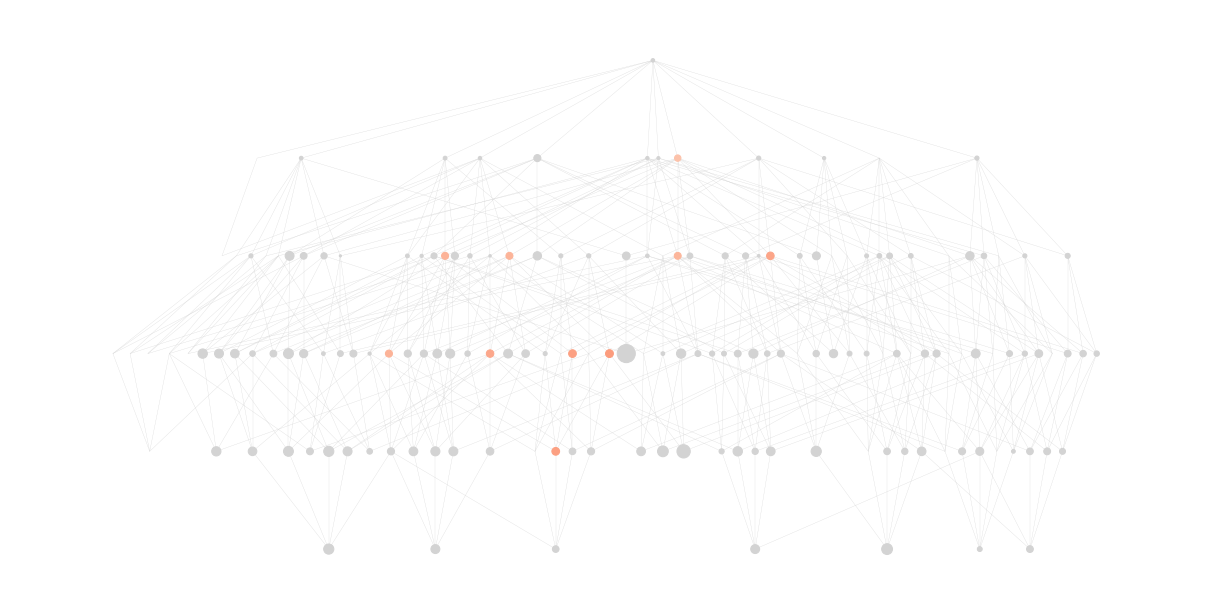

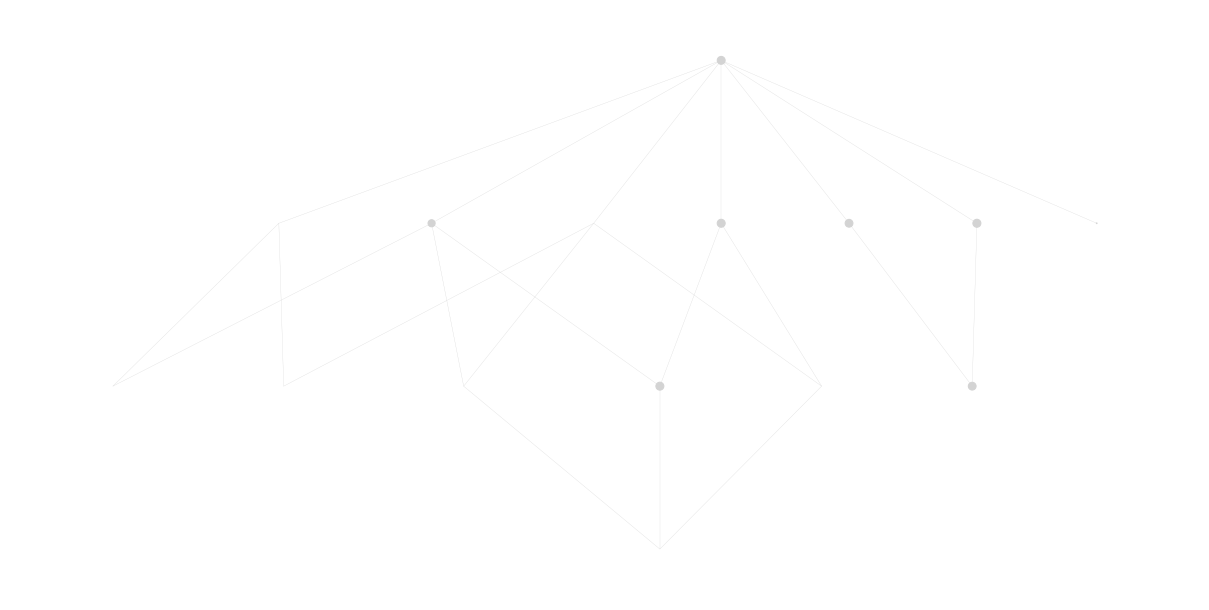

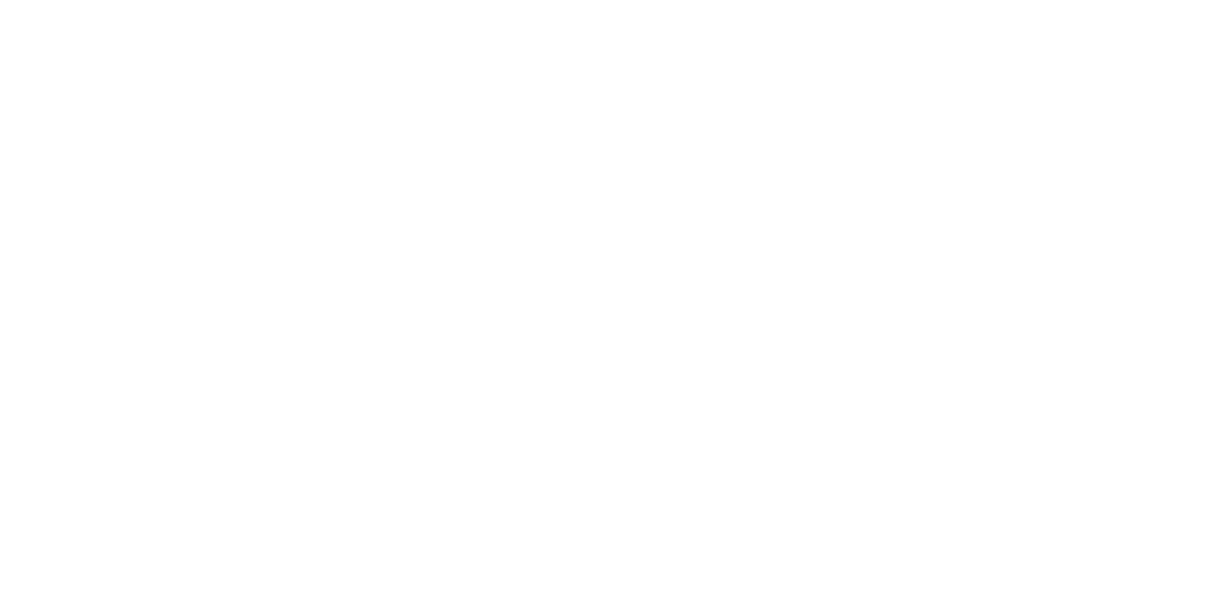

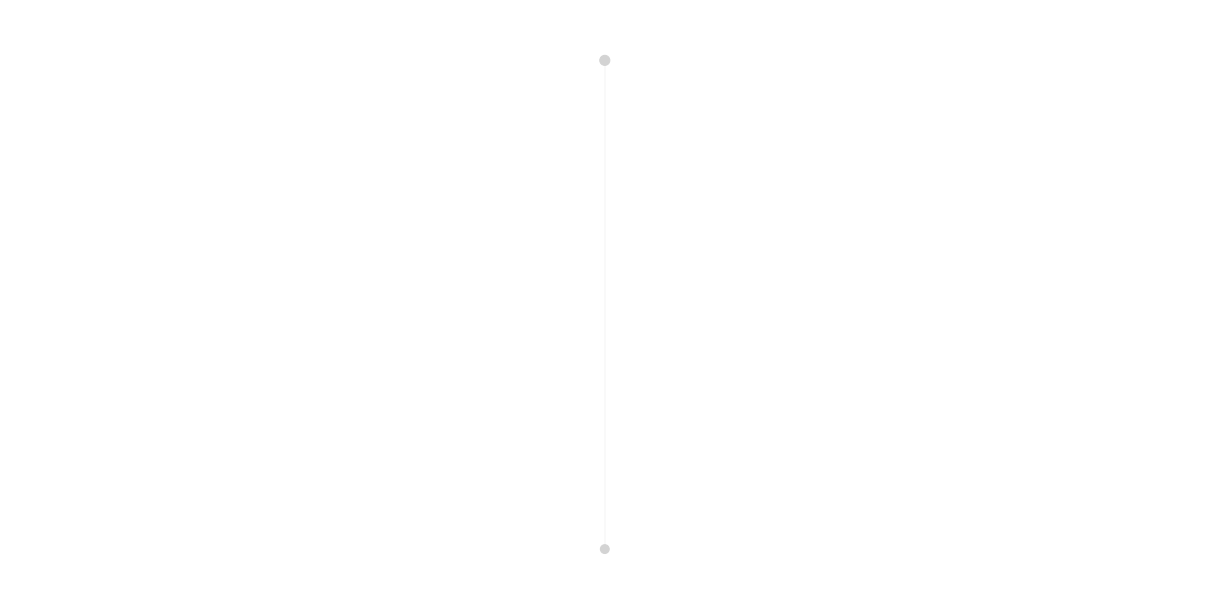

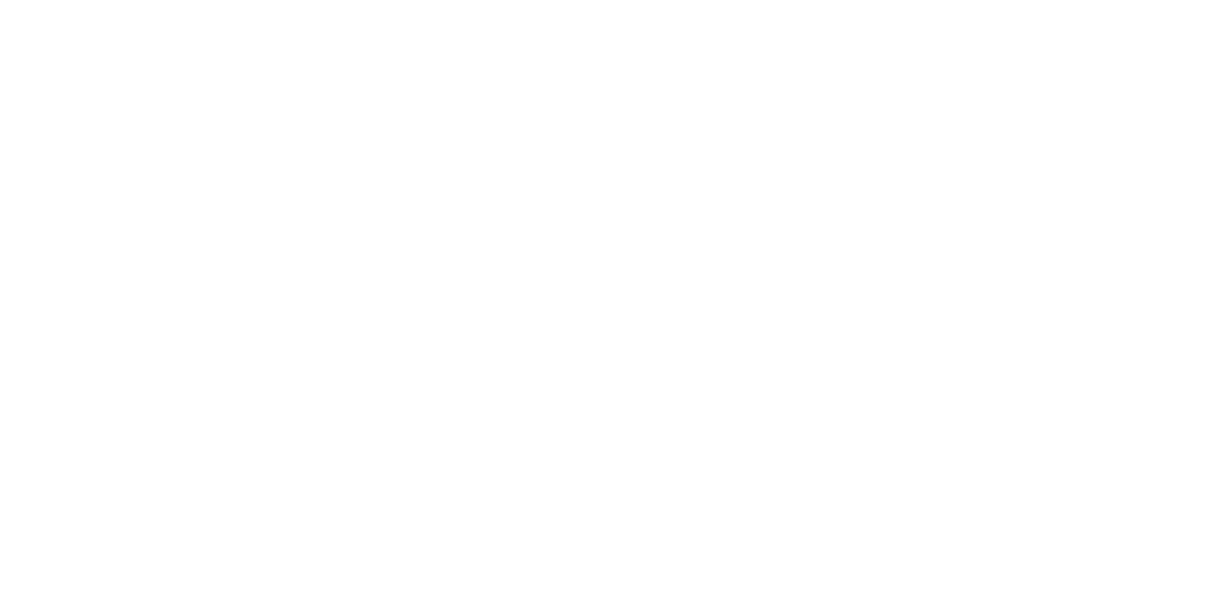

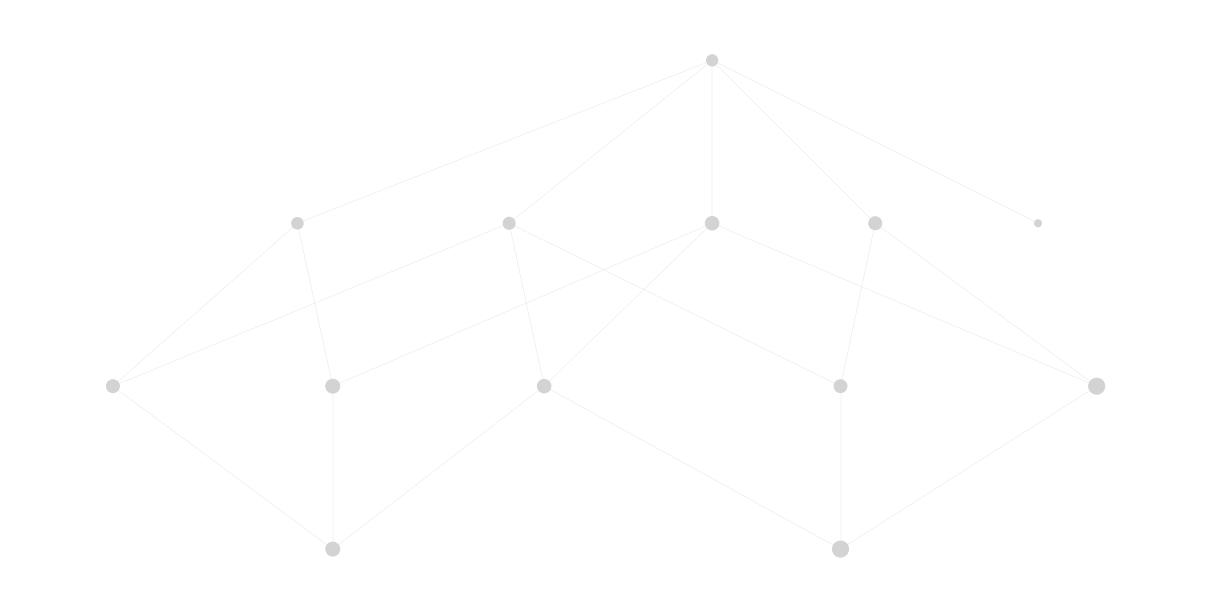

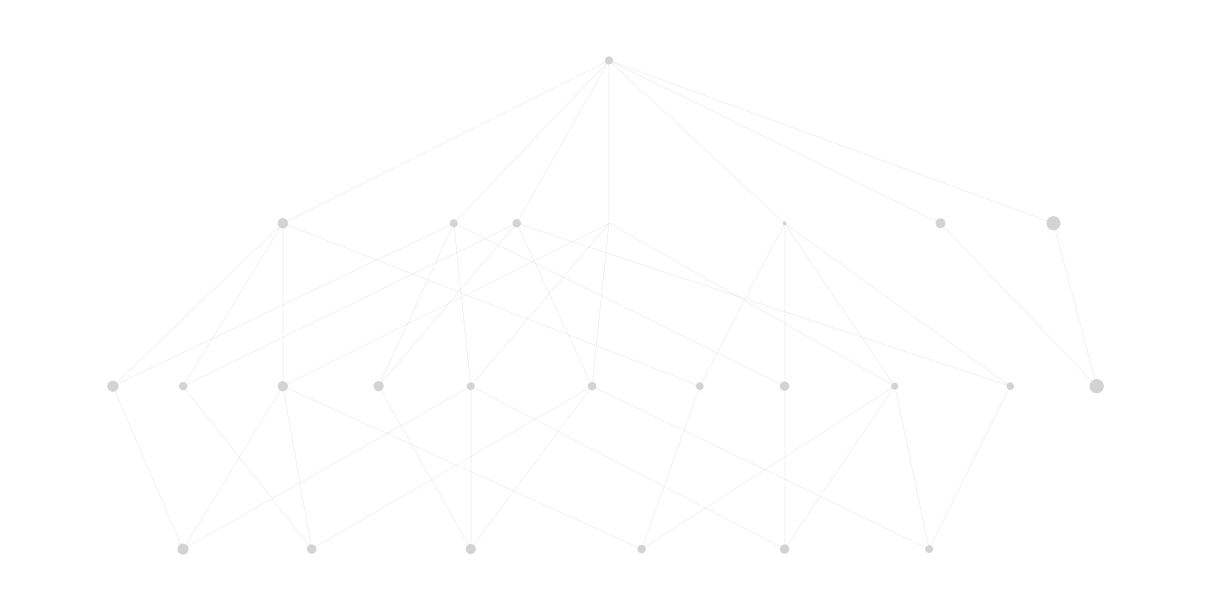

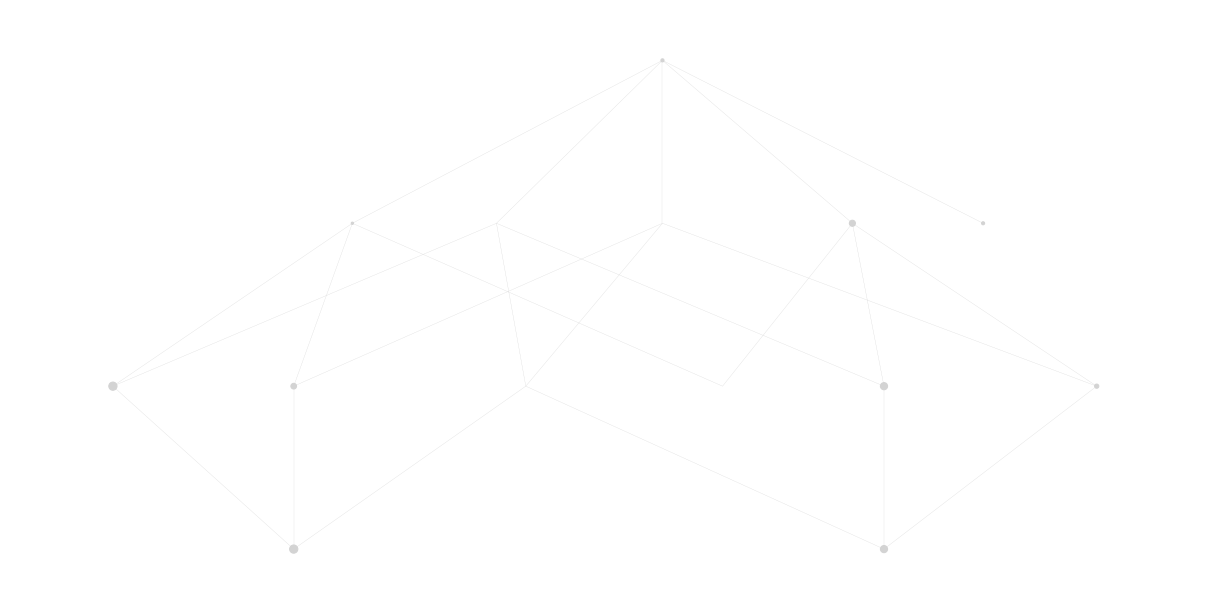

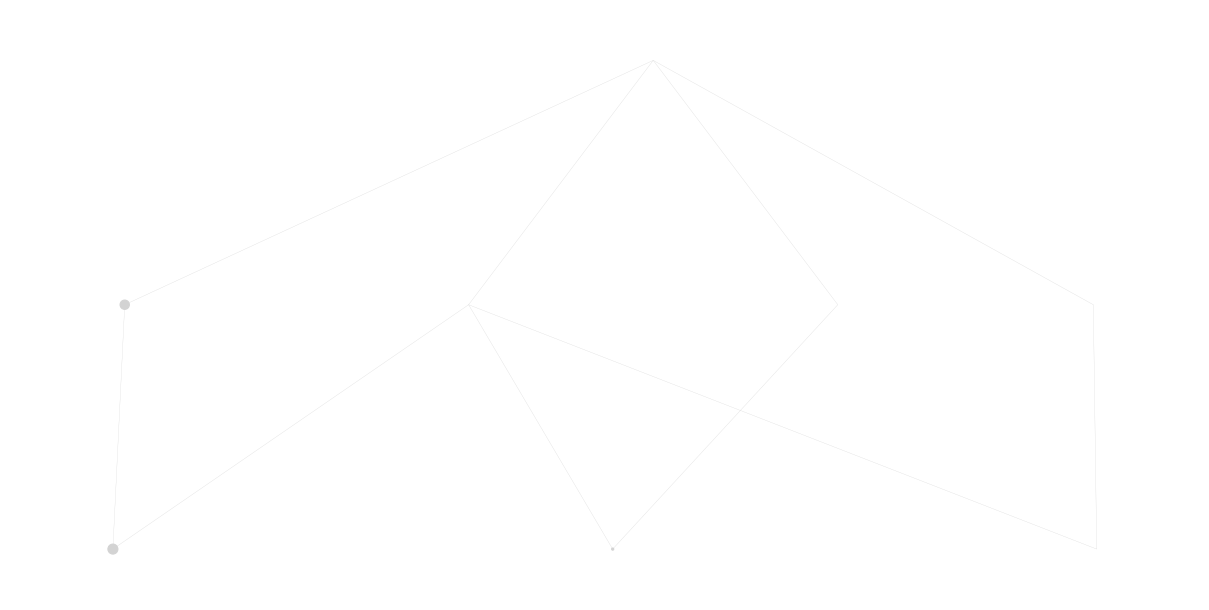

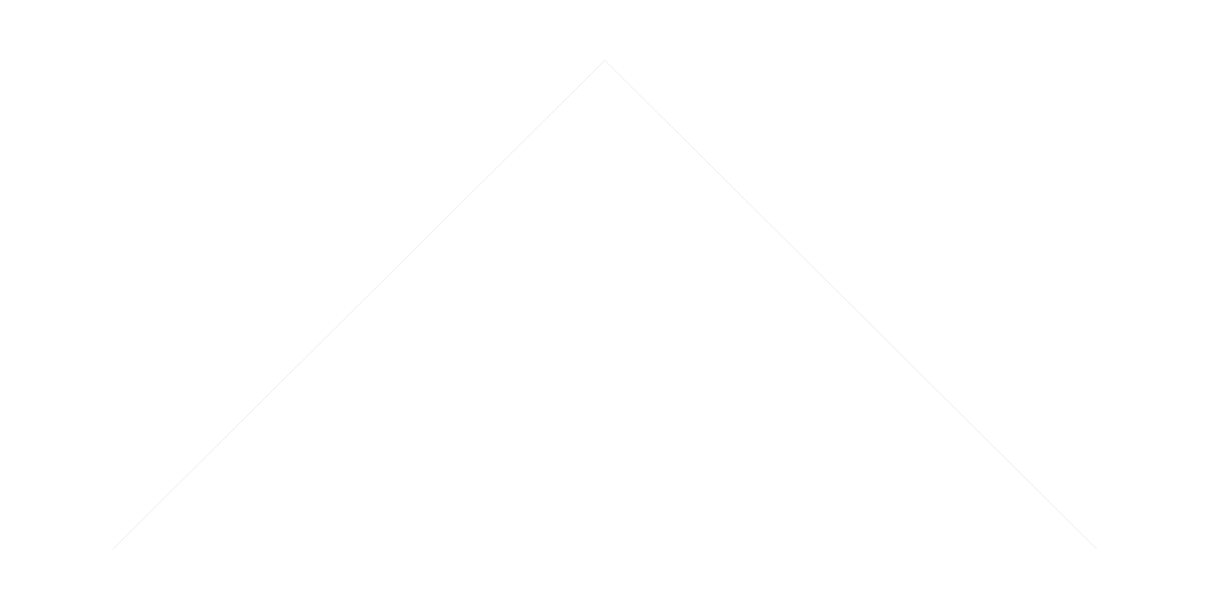

In [438]:
# 1 if row is parent of column. Also make a graph concurrently.
for gene_group in set(coding_results['gene_group']):
    print(gene_group)

    categories = coding_results[coding_results['gene_group'] == gene_group]['category_name'].tolist()
 
    parent_child = pd.DataFrame(0, index = categories, columns = categories)
    
    dg = nx.DiGraph()

    for i, cat_i in enumerate(categories):
        for j, cat_j in enumerate(categories):
            parent_rel = classify_coding_relationship(cat_i, cat_j)
            parent_child.iloc[i, j] = parent_rel

            if parent_rel and cat_i != cat_j:
                dg.add_edge(cat_i, cat_j)

    # do transitive reduction - ie removes "superparent" relationships
    dg = nx.transitive_reduction(dg)
    
    node_df = nbl_framework_results.set_index('category_name').loc[list(dg.nodes)]
    
    # determine node positions
    pos = graphviz_layout(dg, prog = 'dot') #, args='-Grankdir=LR')

    # and determine node size
    node_size = node_df['point_estimate']
    node_pvals = node_df['negative_log10_p_value']

    # make node colors
    # norm = mpl.colors.Normalize(vmin=0, vmax=round(node_size[node_pvals > 3.5].max(), 1))
    cmap_reds = plt.cm.Reds
    cmap_greys = plt.cm.Greys

    node_colors = []
    for i in range(len(node_size)):
        size = node_size.iloc[i]
        p = node_pvals.iloc[i]

        if p < 3.5:
            node_colors.append('lightgrey')
        else:
            node_colors.append(cmap_reds(norm(size)))
            
    fig, ax = plt.subplots(1, figsize = (16, 8))
    nx.draw(dg, with_labels=False, ax = ax, pos = pos, arrows = False, edge_color = 'lightgrey',
            node_size = node_size * 100, node_color = node_colors, width = 0.2)
    fig.savefig(f'data/cwas-results/category-hierarchies/coding-{gene_group}-tree.png', bbox_inches = 'tight')

# But what about all TAD boundaries?

In [388]:
# tad_boundaries = nbl_framework_results[(nbl_framework_results['category_name'].str.contains('\.neuroblastoma_tad_boundary\.'))]['category_name'].tolist()
noncoding_results = nbl_framework_results.query('sv_category == "non-coding"').copy()
noncoding_results['functional_category'] = noncoding_results['category_name'].apply(lambda cat: cat.split('.')[3])

In [ ]:
subcharacteristic_parents = {'sv_type': 'ANY',
                        'frequency': 'RARE',
                        'functional_intersection': 'ANY',
                        'functional_category': '',
                        'genic_relationship': 'ANY',
                        'constraint': 'ANY',
                        'expression': 'ANY',
                        'gene_group': ''}

In [ ]:
nbl_coding_framework

sv_type  frequency                           genic_relationship  \
0          DUP       RARE                          PREDICTED_COPY_GAIN   
1          DEL  SINGLETON                PREDICTED_INTRAGENIC_EXON_DUP   
2   CPX_or_INV        NaN  PREDICTED_LOF_or_PREDICTED_PARTIAL_EXON_DUP   
3      INS_ALL        NaN                                          ANY   
4          ANY        NaN                                          NaN   
5          NaN        NaN                                          NaN   
6          NaN        NaN                                          NaN   
7          NaN        NaN                                          NaN   
8          NaN        NaN                                          NaN   
9          NaN        NaN                                          NaN   
10         NaN        NaN                                          NaN   
11         NaN        NaN                                          NaN   
12         NaN        NaN                                          NaN   
13         NaN        NaN                                          NaN   
14         NaN        NaN                                          NaN   

              constraint                  expression  \
0        lof_constrained  expressed_in_adrenal_gland   
1   missense_constrained                         ANY   
2          unconstrained                         NaN   
3                    ANY                         NaN   
4                    NaN                         NaN   
5                    NaN                         NaN   
6                    NaN                         NaN   
7                    NaN                         NaN   
8                    NaN                         NaN   
9                    NaN                         NaN   
10                   NaN                         NaN   
11                   NaN                         NaN   
12                   NaN                         NaN   
13                   NaN                         NaN   
14                   NaN                         NaN   

                                           gene_group  
0                                      protein_coding  
1                                 cosmic_cancer_genes  
2                                       germline_CPGs  
3                          base_excision_repair_genes  
4                        chromatin_organization_genes  
5                             dna_damage_bypass_genes  
6                           dna_damage_reversal_genes  
7                                dna_DSB_repair_genes  
8                              dna_DSB_response_genes  
9                                    dna_repair_genes  
10                                      fanconi_genes  
11                              mismatch_repair_genes  
12                   nucleotide_excision_repair_genes  
13                     oncogenic_MAPK_signaling_genes  
14  signaling_transduction_by_receptor_tyrosine_ki...

In [408]:
norm = mpl.colors.Normalize(vmin=0, vmax=1)

neuroblastoma_chromHMM15_TssAFlnk


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_chromHMM15_EnhBiv_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_atac_peaks_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_ABC_MAX_enhancer


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_chromHMM15_EnhG


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_H3K27Ac_peak_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_encode_consensus_enhancers_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_chromHMM15_EnhBiv


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_H3K27Ac_peak


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_chromHMM15_TssAFlnk_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_tad_boundary


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_ABC_MAX_enhancer_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_tad_boundary_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


fragile_site


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_chromHMM15_Enh


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


recombination_hotspot_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_chromHMM15_EnhG_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_encode_consensus_enhancers


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_chromHMM15_Enh_conserved


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


neuroblastoma_atac_peaks


/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


recombination_hotspot


/var/folders/vj/vy31kv2s22g8d_0w2mkfthwc0000gn/T/ipykernel_20374/517404779.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize = (16, 8))
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


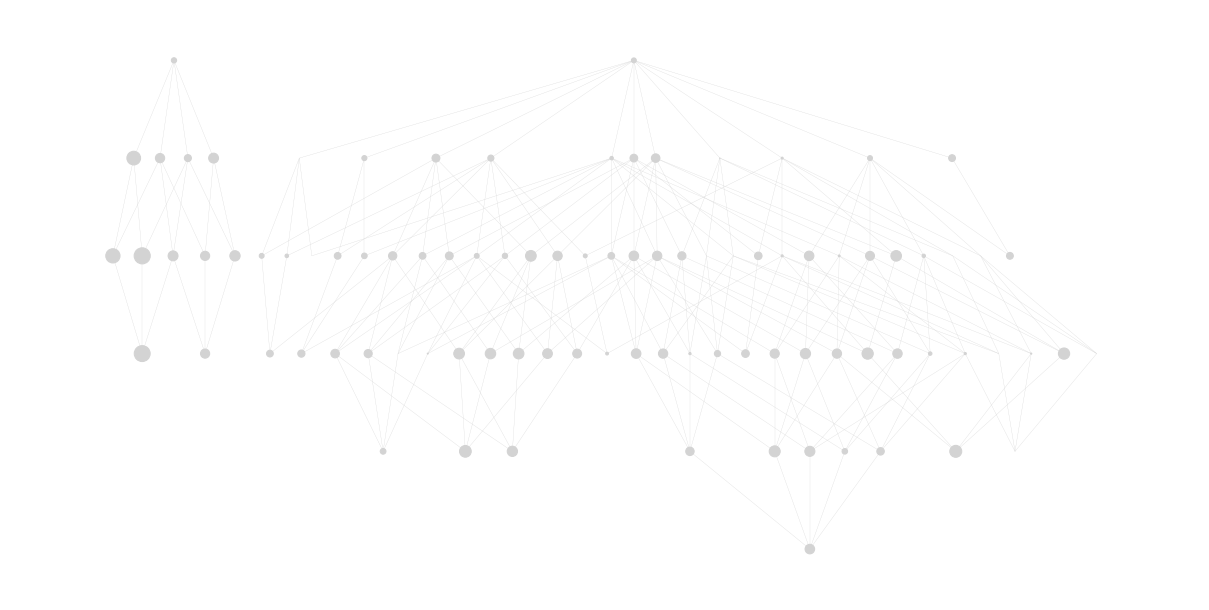

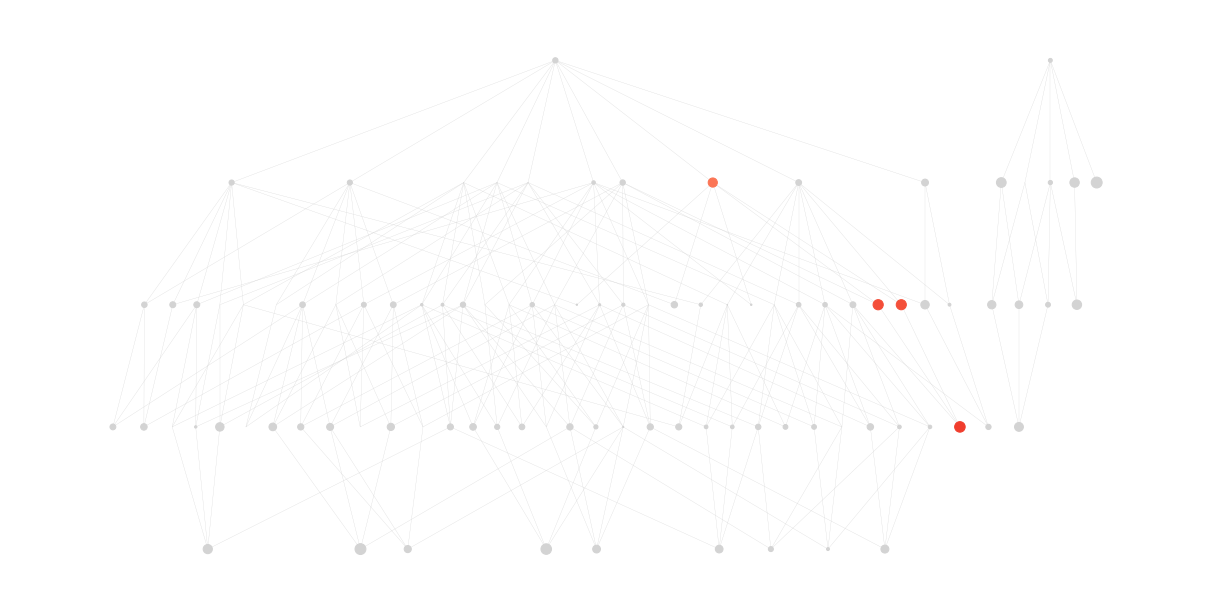

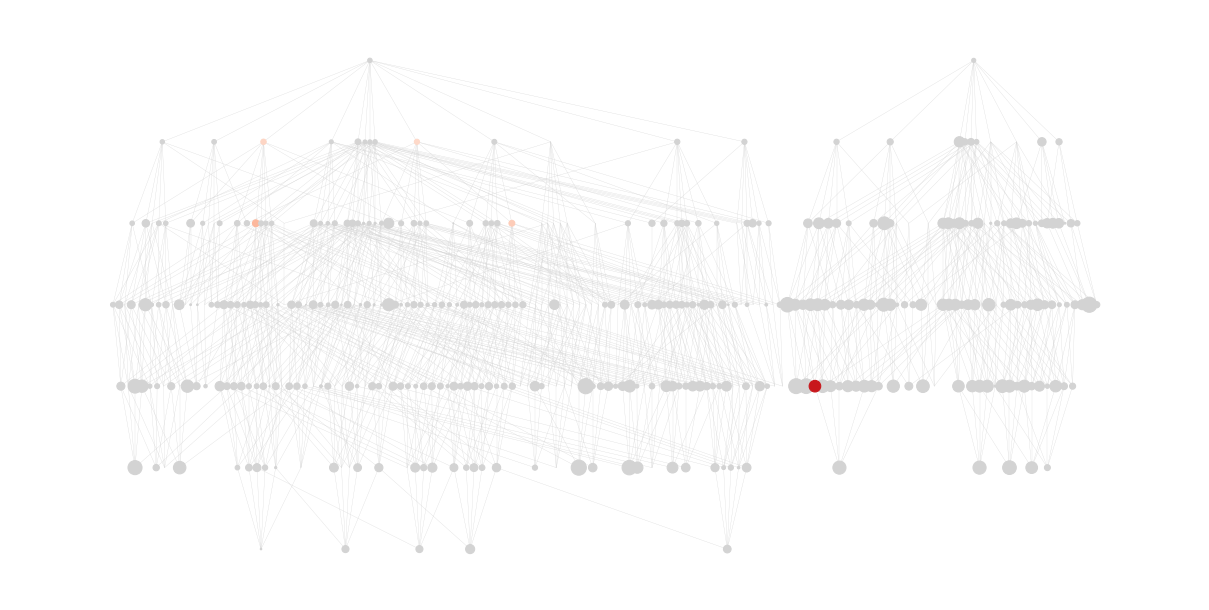

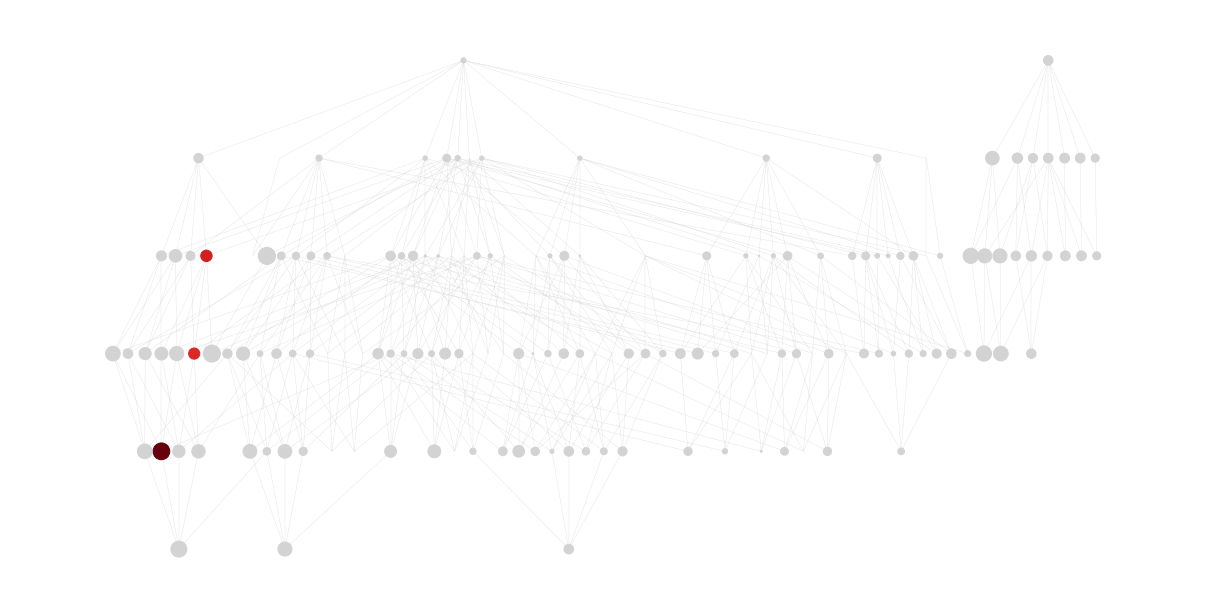

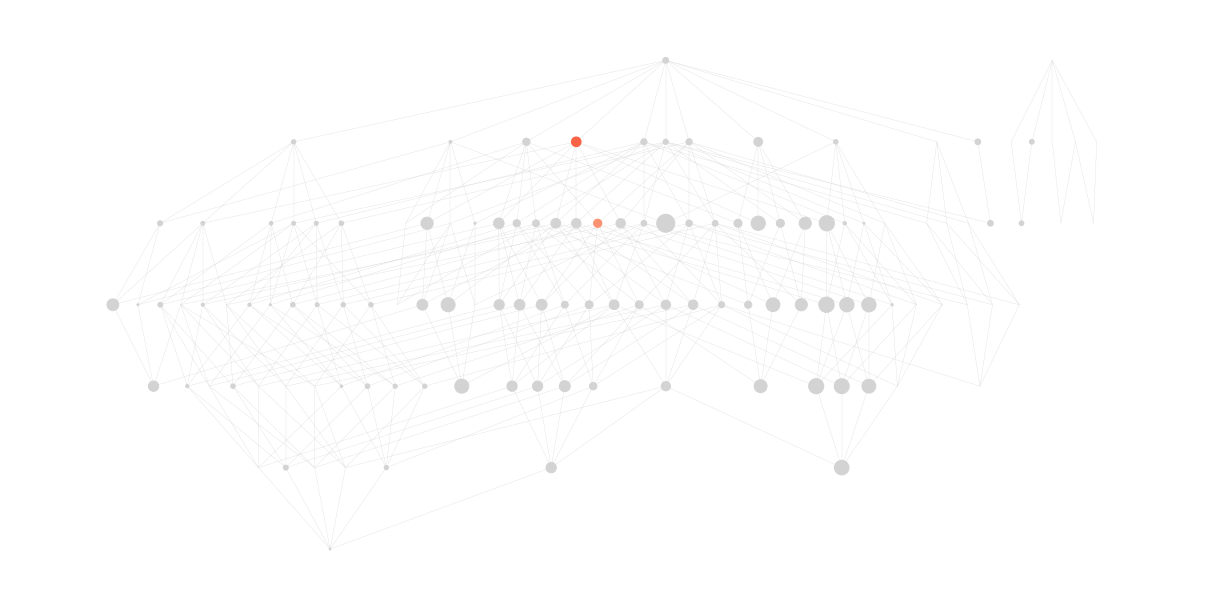

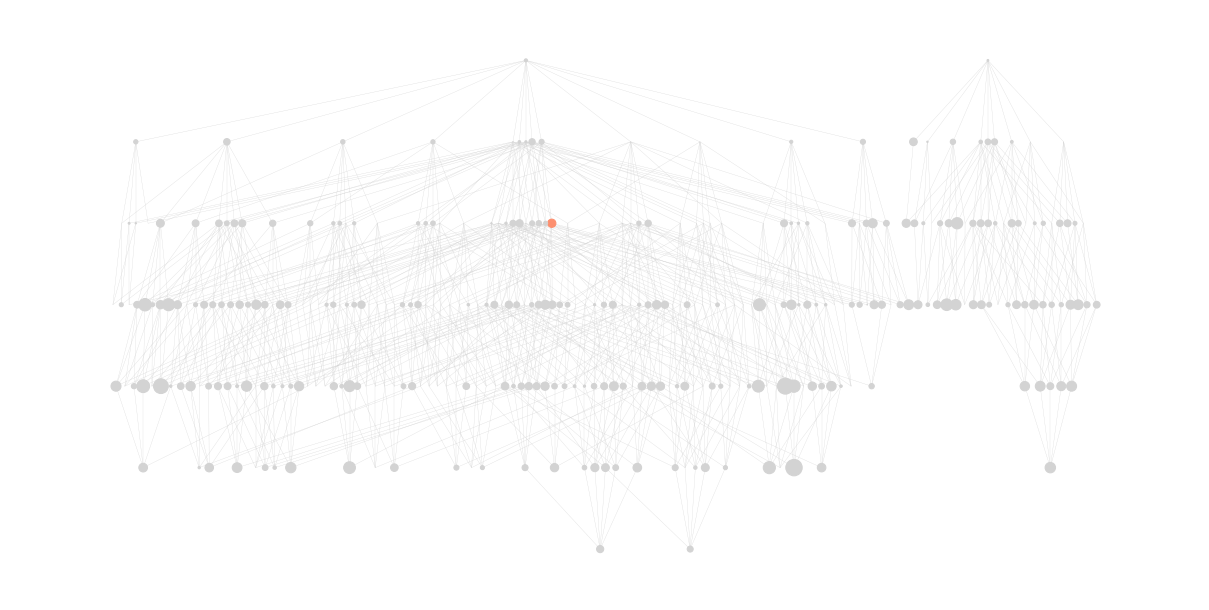

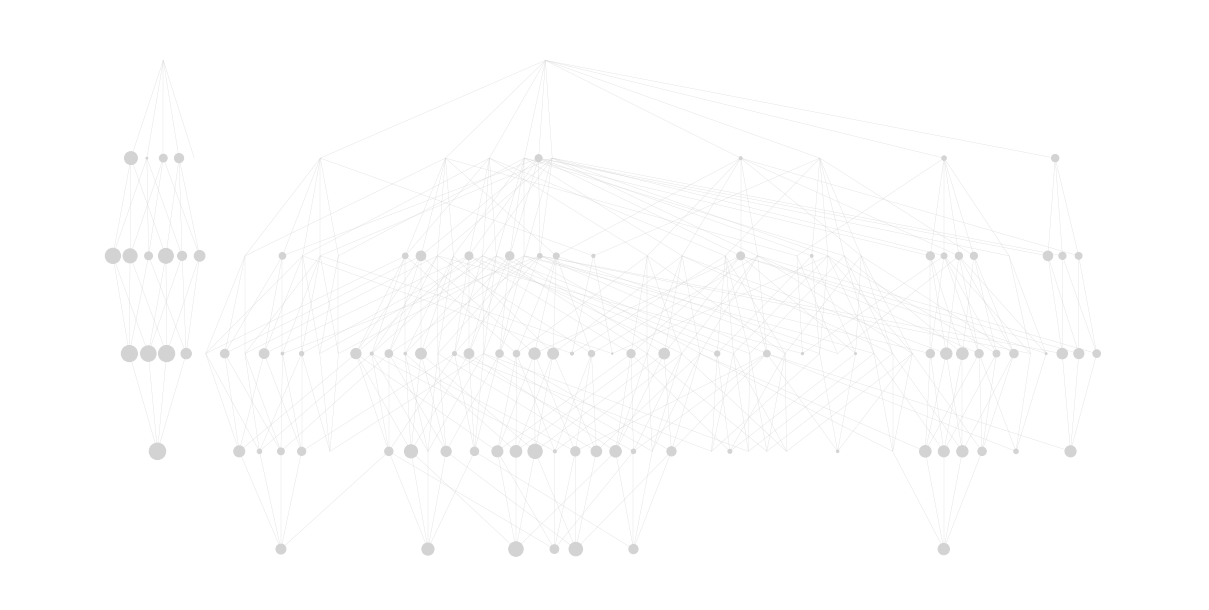

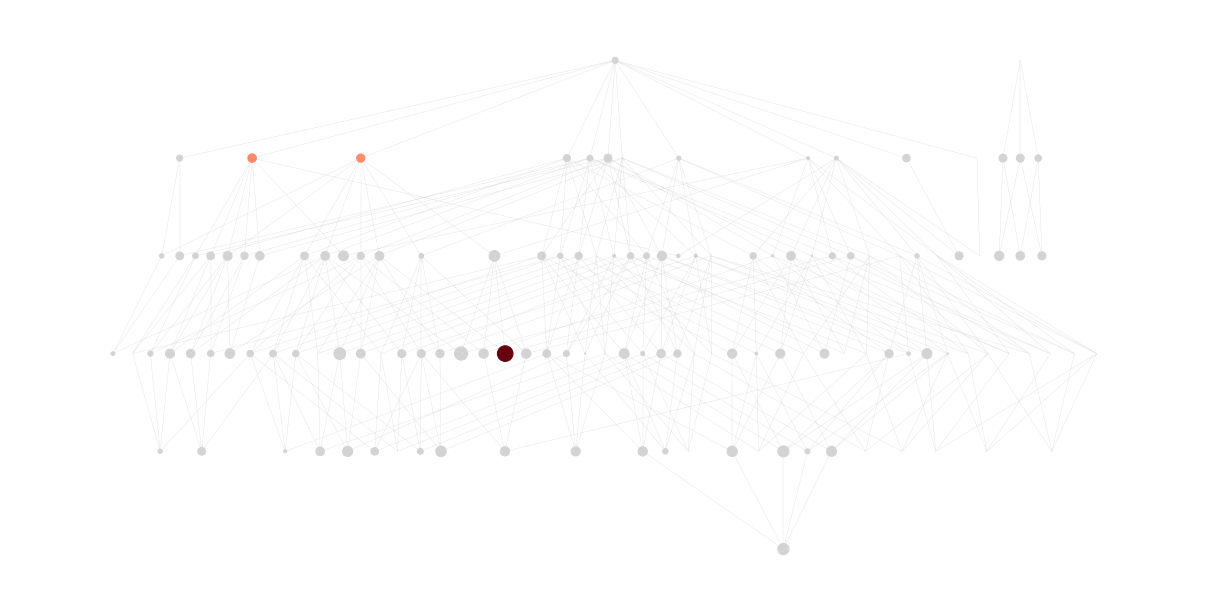

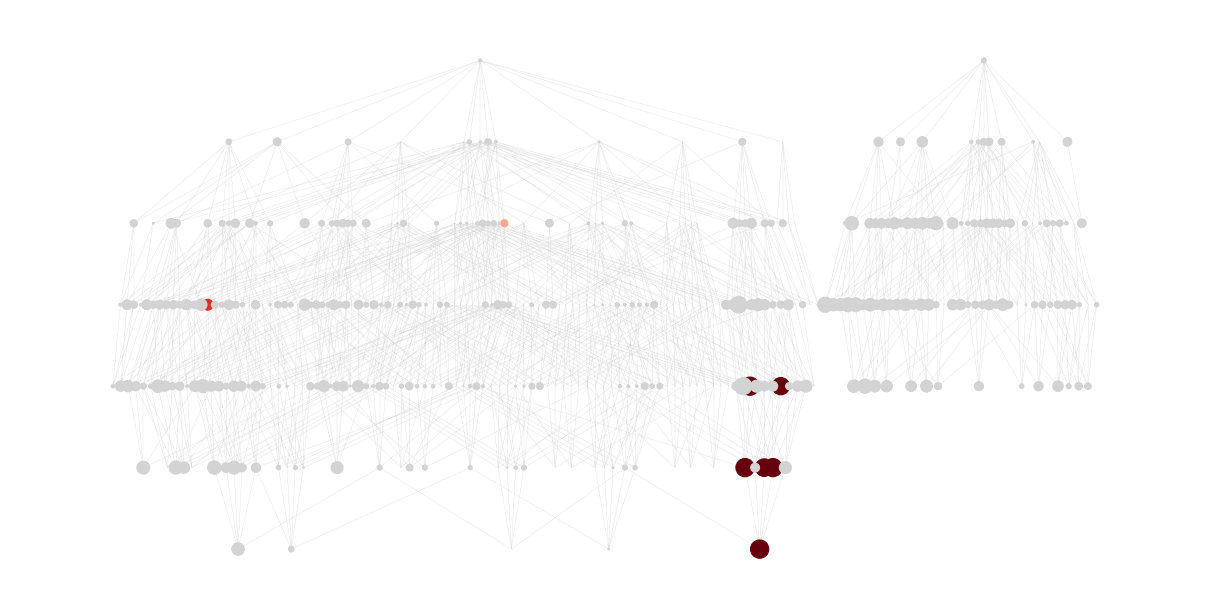

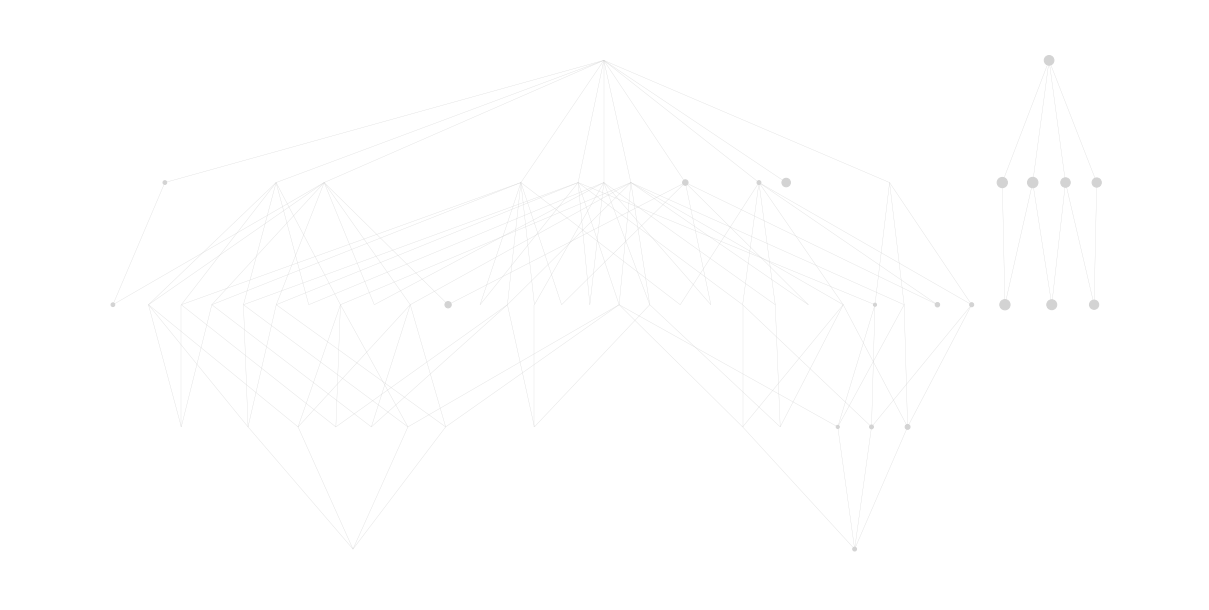

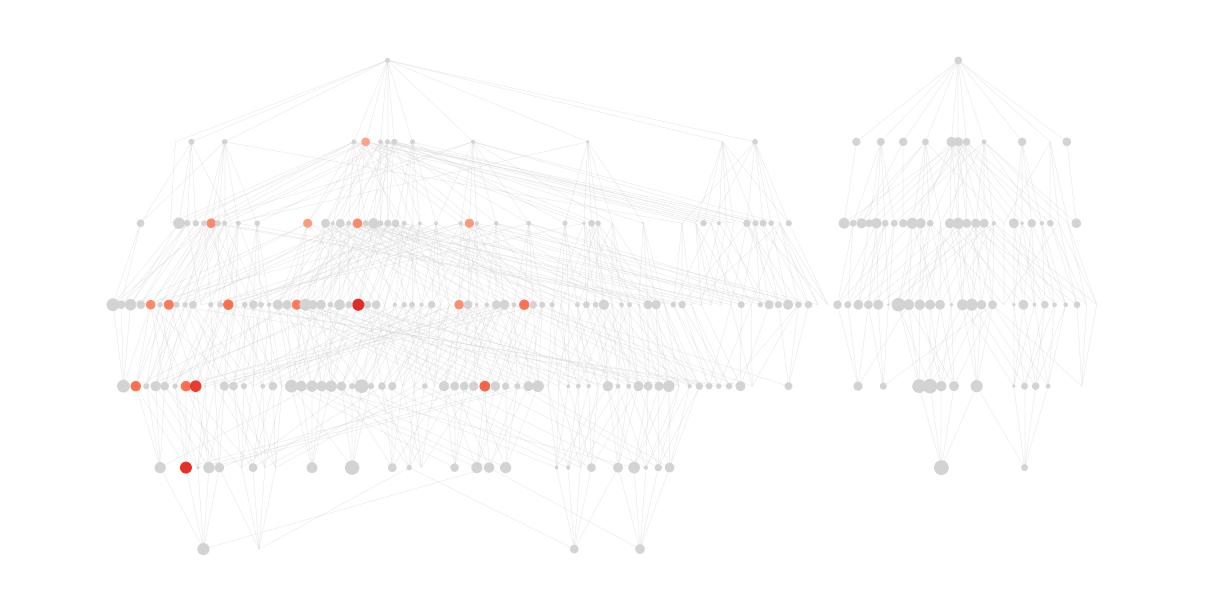

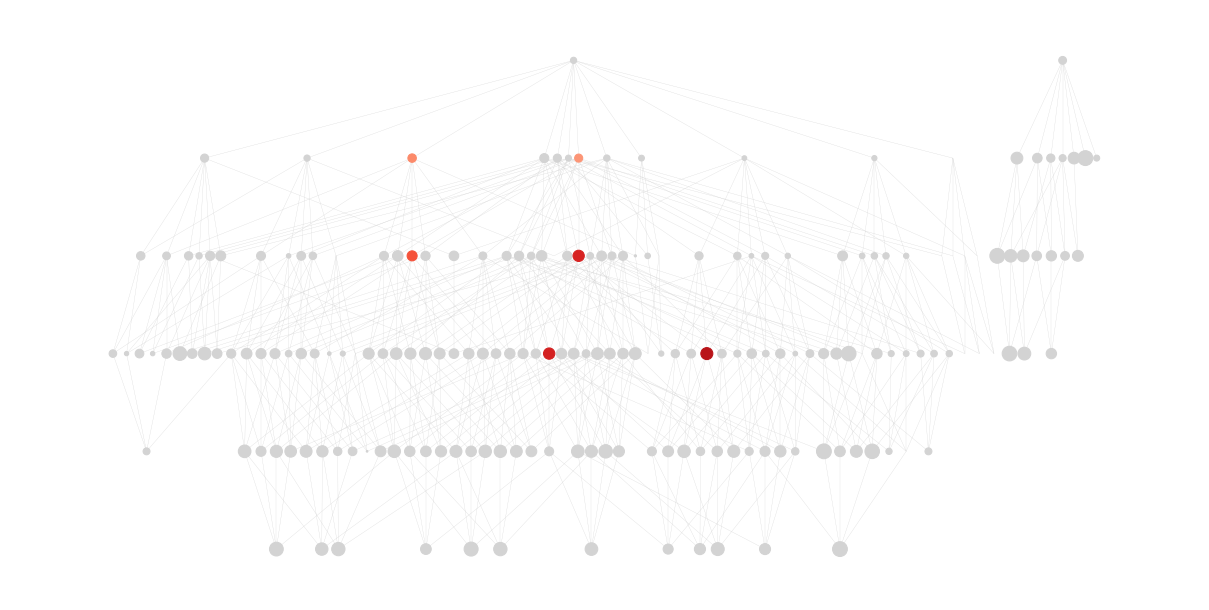

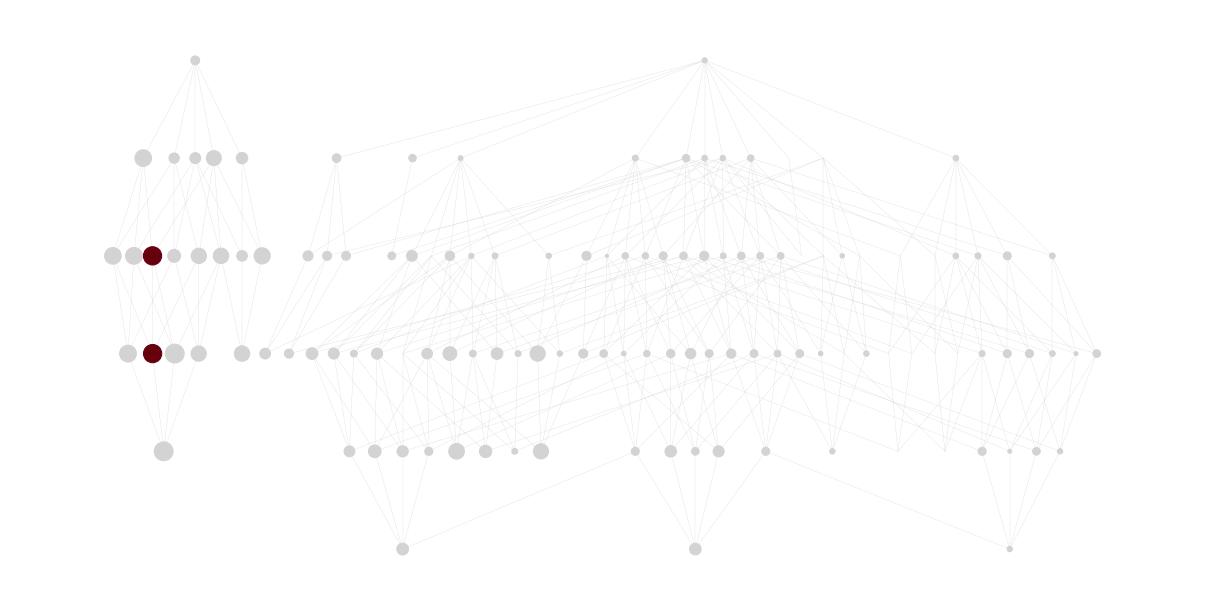

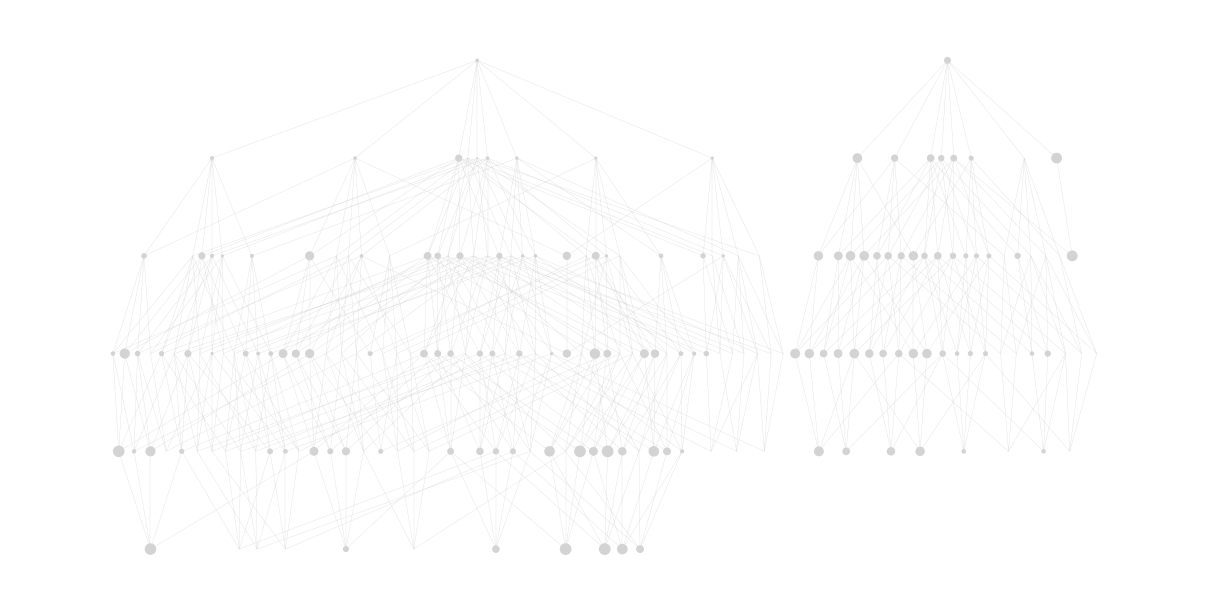

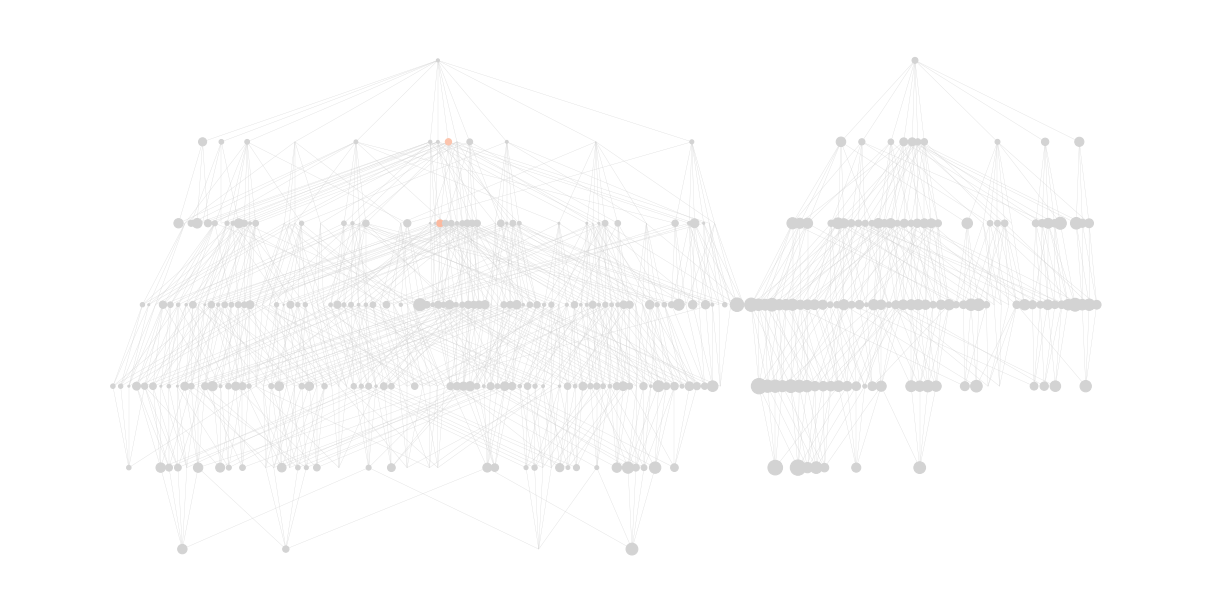

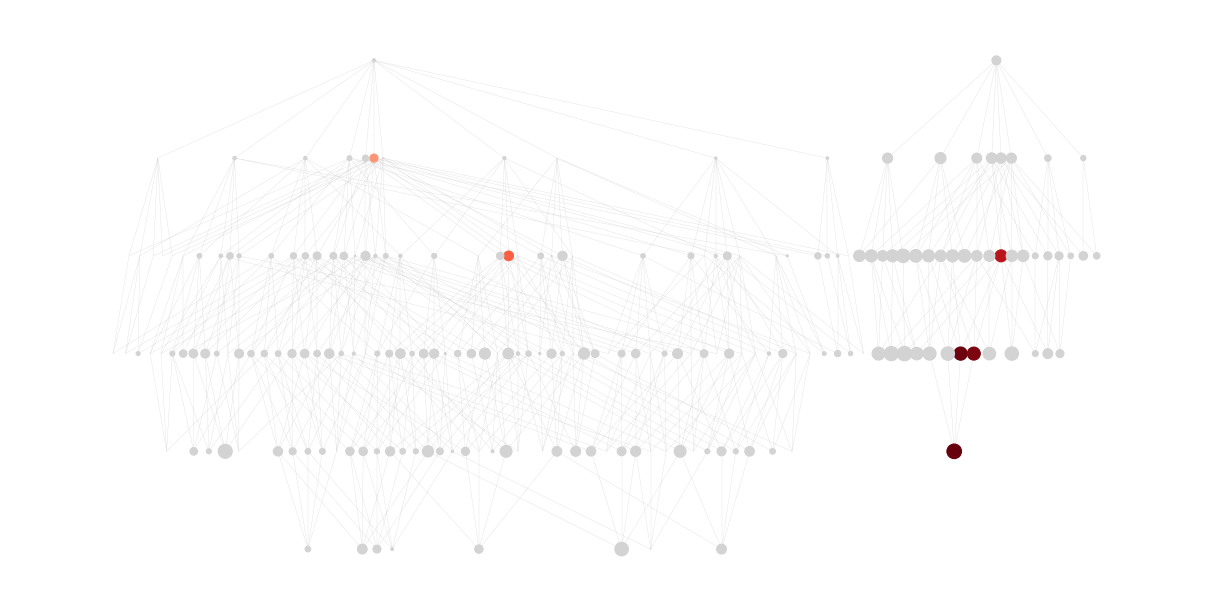

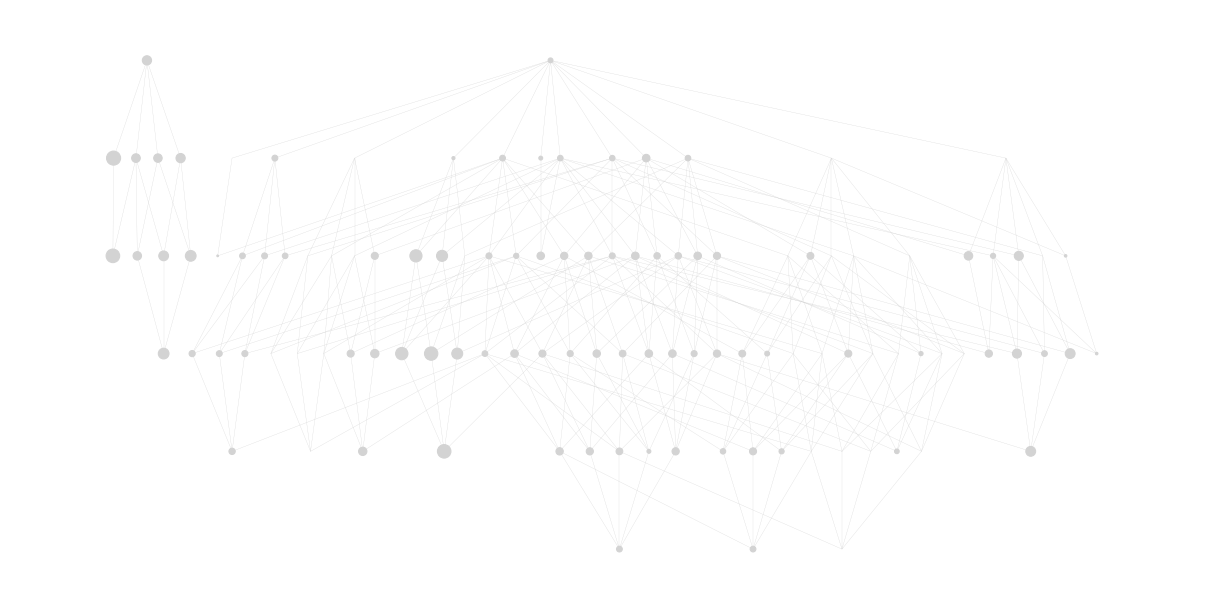

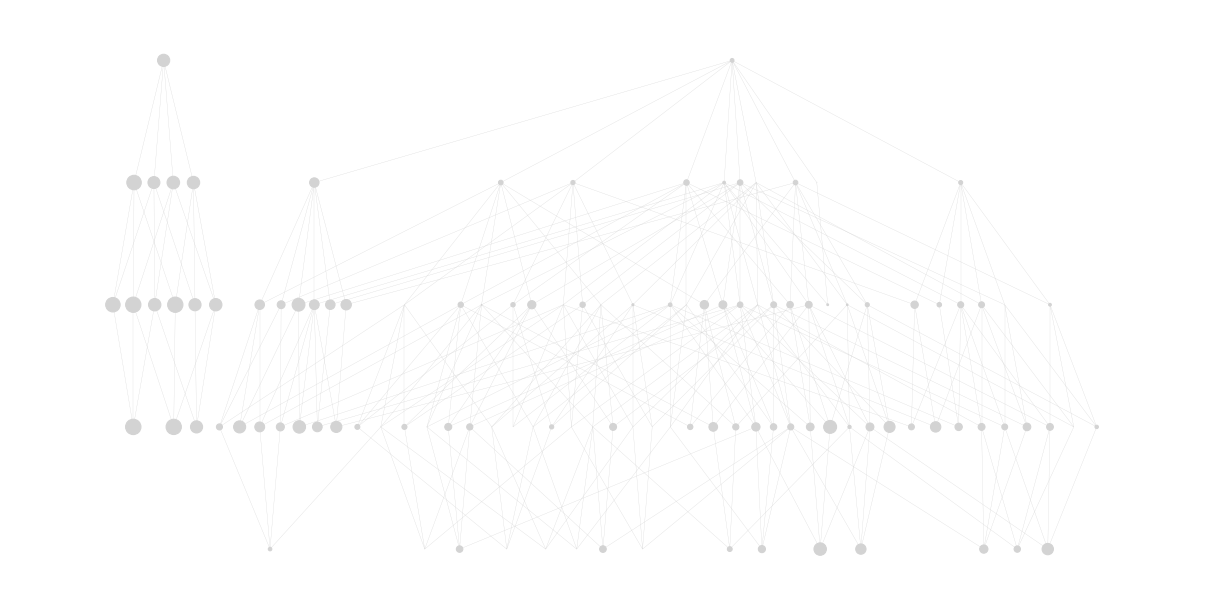

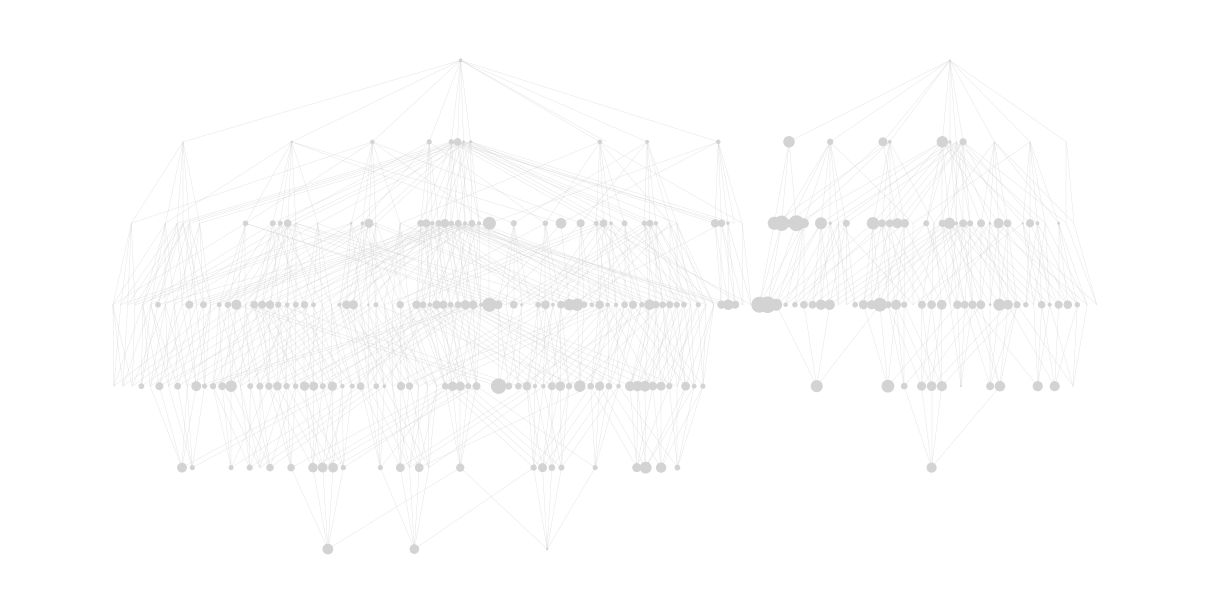

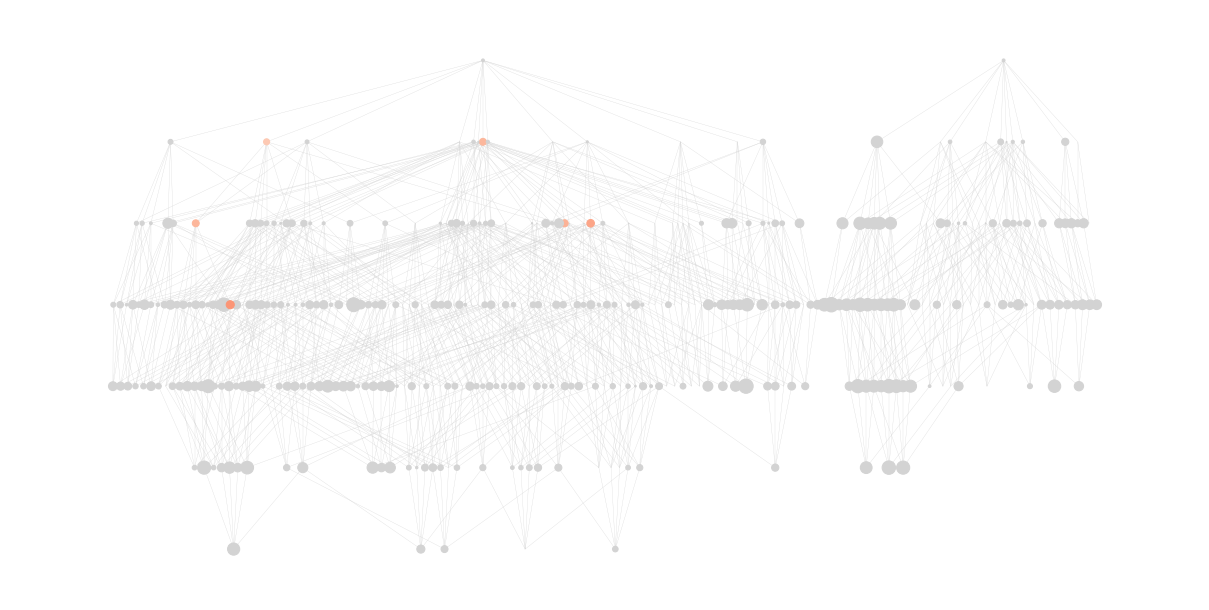

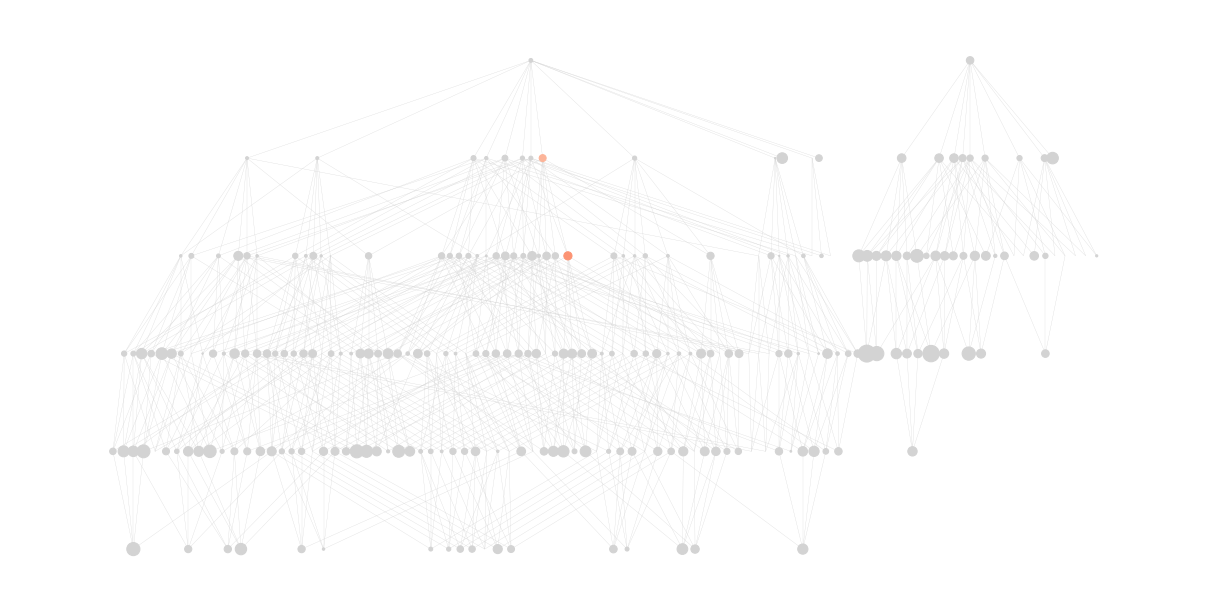

In [409]:
# 1 if row is parent of column. Also make a graph concurrently.
for func_cat in set(noncoding_results['functional_category']):
    print(func_cat)

    categories = noncoding_results[noncoding_results['functional_category'] == func_cat]['category_name'].tolist()
 
    parent_child = pd.DataFrame(0, index = categories, columns = categories)
    
    dg = nx.DiGraph()

    for i, cat_i in enumerate(categories):
        for j, cat_j in enumerate(categories):
            parent_rel = classify_relationship(cat_i, cat_j)
            parent_child.iloc[i, j] = parent_rel

            if parent_rel and cat_i != cat_j:
                dg.add_edge(cat_i, cat_j)

    # do transitive reduction - ie removes "superparent" relationships
    dg = nx.transitive_reduction(dg)
    
    node_df = nbl_framework_results.set_index('category_name').loc[list(dg.nodes)]
    
    # determine node positions
    pos = graphviz_layout(dg, prog = 'dot') #, args='-Grankdir=LR')

    # and determine node size
    node_size = node_df['point_estimate']
    node_pvals = node_df['negative_log10_p_value']

    # make node colors
    # norm = mpl.colors.Normalize(vmin=0, vmax=round(node_size[node_pvals > 3.5].max(), 1))
    cmap_reds = plt.cm.Reds
    cmap_greys = plt.cm.Greys

    node_colors = []
    for i in range(len(node_size)):
        size = node_size.iloc[i]
        p = node_pvals.iloc[i]

        if p < 3.5:
            node_colors.append('lightgrey')
        else:
            node_colors.append(cmap_reds(norm(size)))
            
    fig, ax = plt.subplots(1, figsize = (16, 8))
    nx.draw(dg, with_labels=False, ax = ax, pos = pos, arrows = False, edge_color = 'lightgrey',
            node_size = node_size * 100, node_color = node_colors, width = 0.2)
    fig.savefig(f'data/cwas-results/category-hierarchies/{func_cat}-tree.png', bbox_inches = 'tight')

In [395]:
node_df

Empty DataFrame
Columns: [point_estimate, std_error, z_score, p_value, SV_counts_cases, SV_counts_cases_max, number_of_cases_with_zero_SVs, total_cases, SV_counts_controls, SV_counts_controls_max, number_of_controls_with_zero_SVs, total_controls, number_of_unique_SVs, sv_type, frequency, mean_SVs_per_case, mean_SVs_per_control, mean_SVs_total, negative_log10_p_value, af_category, sv_category]
Index: []

[0 rows x 21 columns]

In [314]:
node_df = nbl_framework_results.set_index('category_name').loc[list(dg.nodes)]

In [315]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib as mpl

In [320]:
# determine node positions
pos = graphviz_layout(dg, prog = 'dot') #, args='-Grankdir=LR')

# and determine node size
node_size = node_df['point_estimate']
node_pvals = node_df['negative_log10_p_value']

# make node colors
norm = mpl.colors.Normalize(vmin=0, vmax=round(node_size[node_pvals > 3.5].max(), 1))
cmap_reds = plt.cm.Reds
cmap_greys = plt.cm.Greys

node_colors = []
for i in range(len(node_size)):
    size = node_size.iloc[i]
    p = node_pvals.iloc[i]
    
    if p < 3.5:
        node_colors.append('lightgrey')
    else:
        node_colors.append(cmap_reds(norm(size)))

/Users/jettcrowdis/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


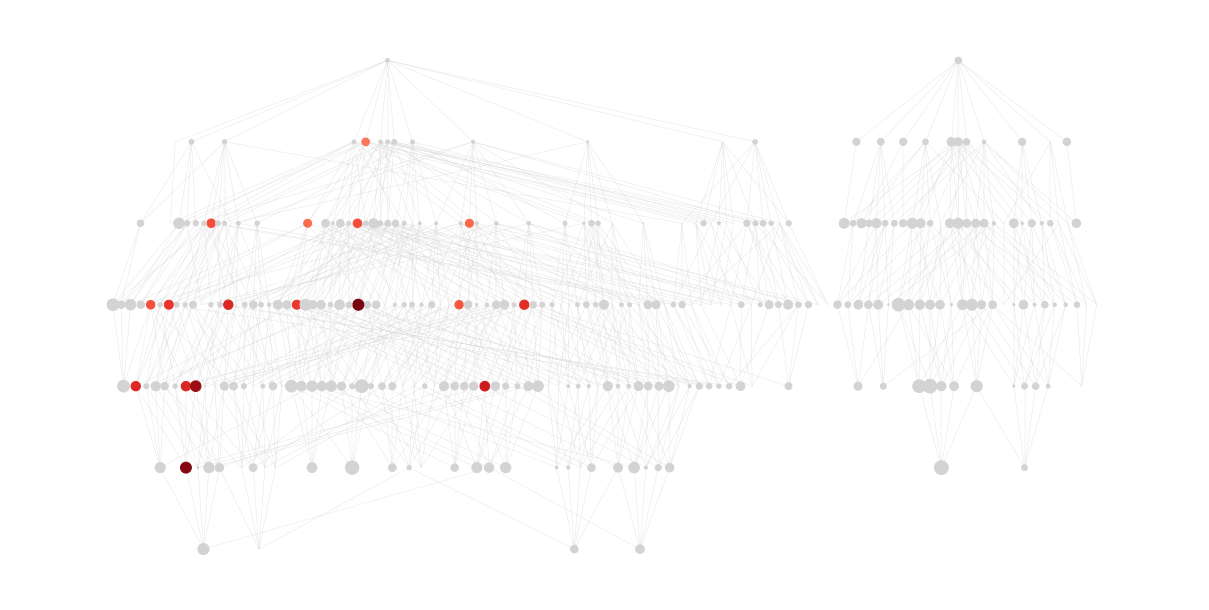

In [341]:
fig, ax = plt.subplots(1, figsize = (16, 8))
nx.draw(dg, with_labels=False, ax = ax, pos = pos, arrows = False, edge_color = 'lightgrey',
        node_size = node_size * 100, node_color = node_colors, width = 0.2)
fig.savefig('data/cwas-results/test-tad-boundary-tree.png', bbox_inches = 'tight')

# I have to know...

In [365]:
all_categories = nbl_framework_results.query('sv_category == "non-coding"')['category_name'].tolist()

In [366]:
# 1 if row is parent of column. Also make a graph concurrently.
parent_child = pd.DataFrame(0, index = all_categories, columns = all_categories)
dg = nx.DiGraph()

for i, cat_i in enumerate(significant_categories):
    if i % 400 == 0:
        print(i, end = ', ')
    for j, cat_j in enumerate(significant_categories):
        parent_rel = classify_relationship(cat_i, cat_j)
        parent_child.iloc[i, j] = parent_rel
        
        if parent_rel and cat_i != cat_j:
            dg.add_edge(cat_i, cat_j)
        
# do transitive reduction - ie removes "superparent" relationships
dg = nx.transitive_reduction(dg)

0, 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 

In [367]:
node_df = nbl_framework_results.set_index('category_name').loc[list(dg.nodes)]

In [374]:
# and determine node size
node_size = node_df['point_estimate']
node_pvals = node_df['negative_log10_p_value']

# make node colors
norm = mpl.colors.Normalize(vmin=0, vmax=round(node_size[node_pvals > 3.5].max(), 1))
cmap_reds = plt.cm.Reds
cmap_greys = plt.cm.Greys

node_colors = []
for i in range(len(node_size)):
    size = node_size.iloc[i]
    p = node_pvals.iloc[i]
    
    if p < 3.5:
        node_colors.append('lightgrey')
    else:
        node_colors.append(cmap_reds(norm(size)))

In [ ]:
# determine node positions
pos = graphviz_layout(dg, prog = 'fdp') #, args='-Grankdir=LR')

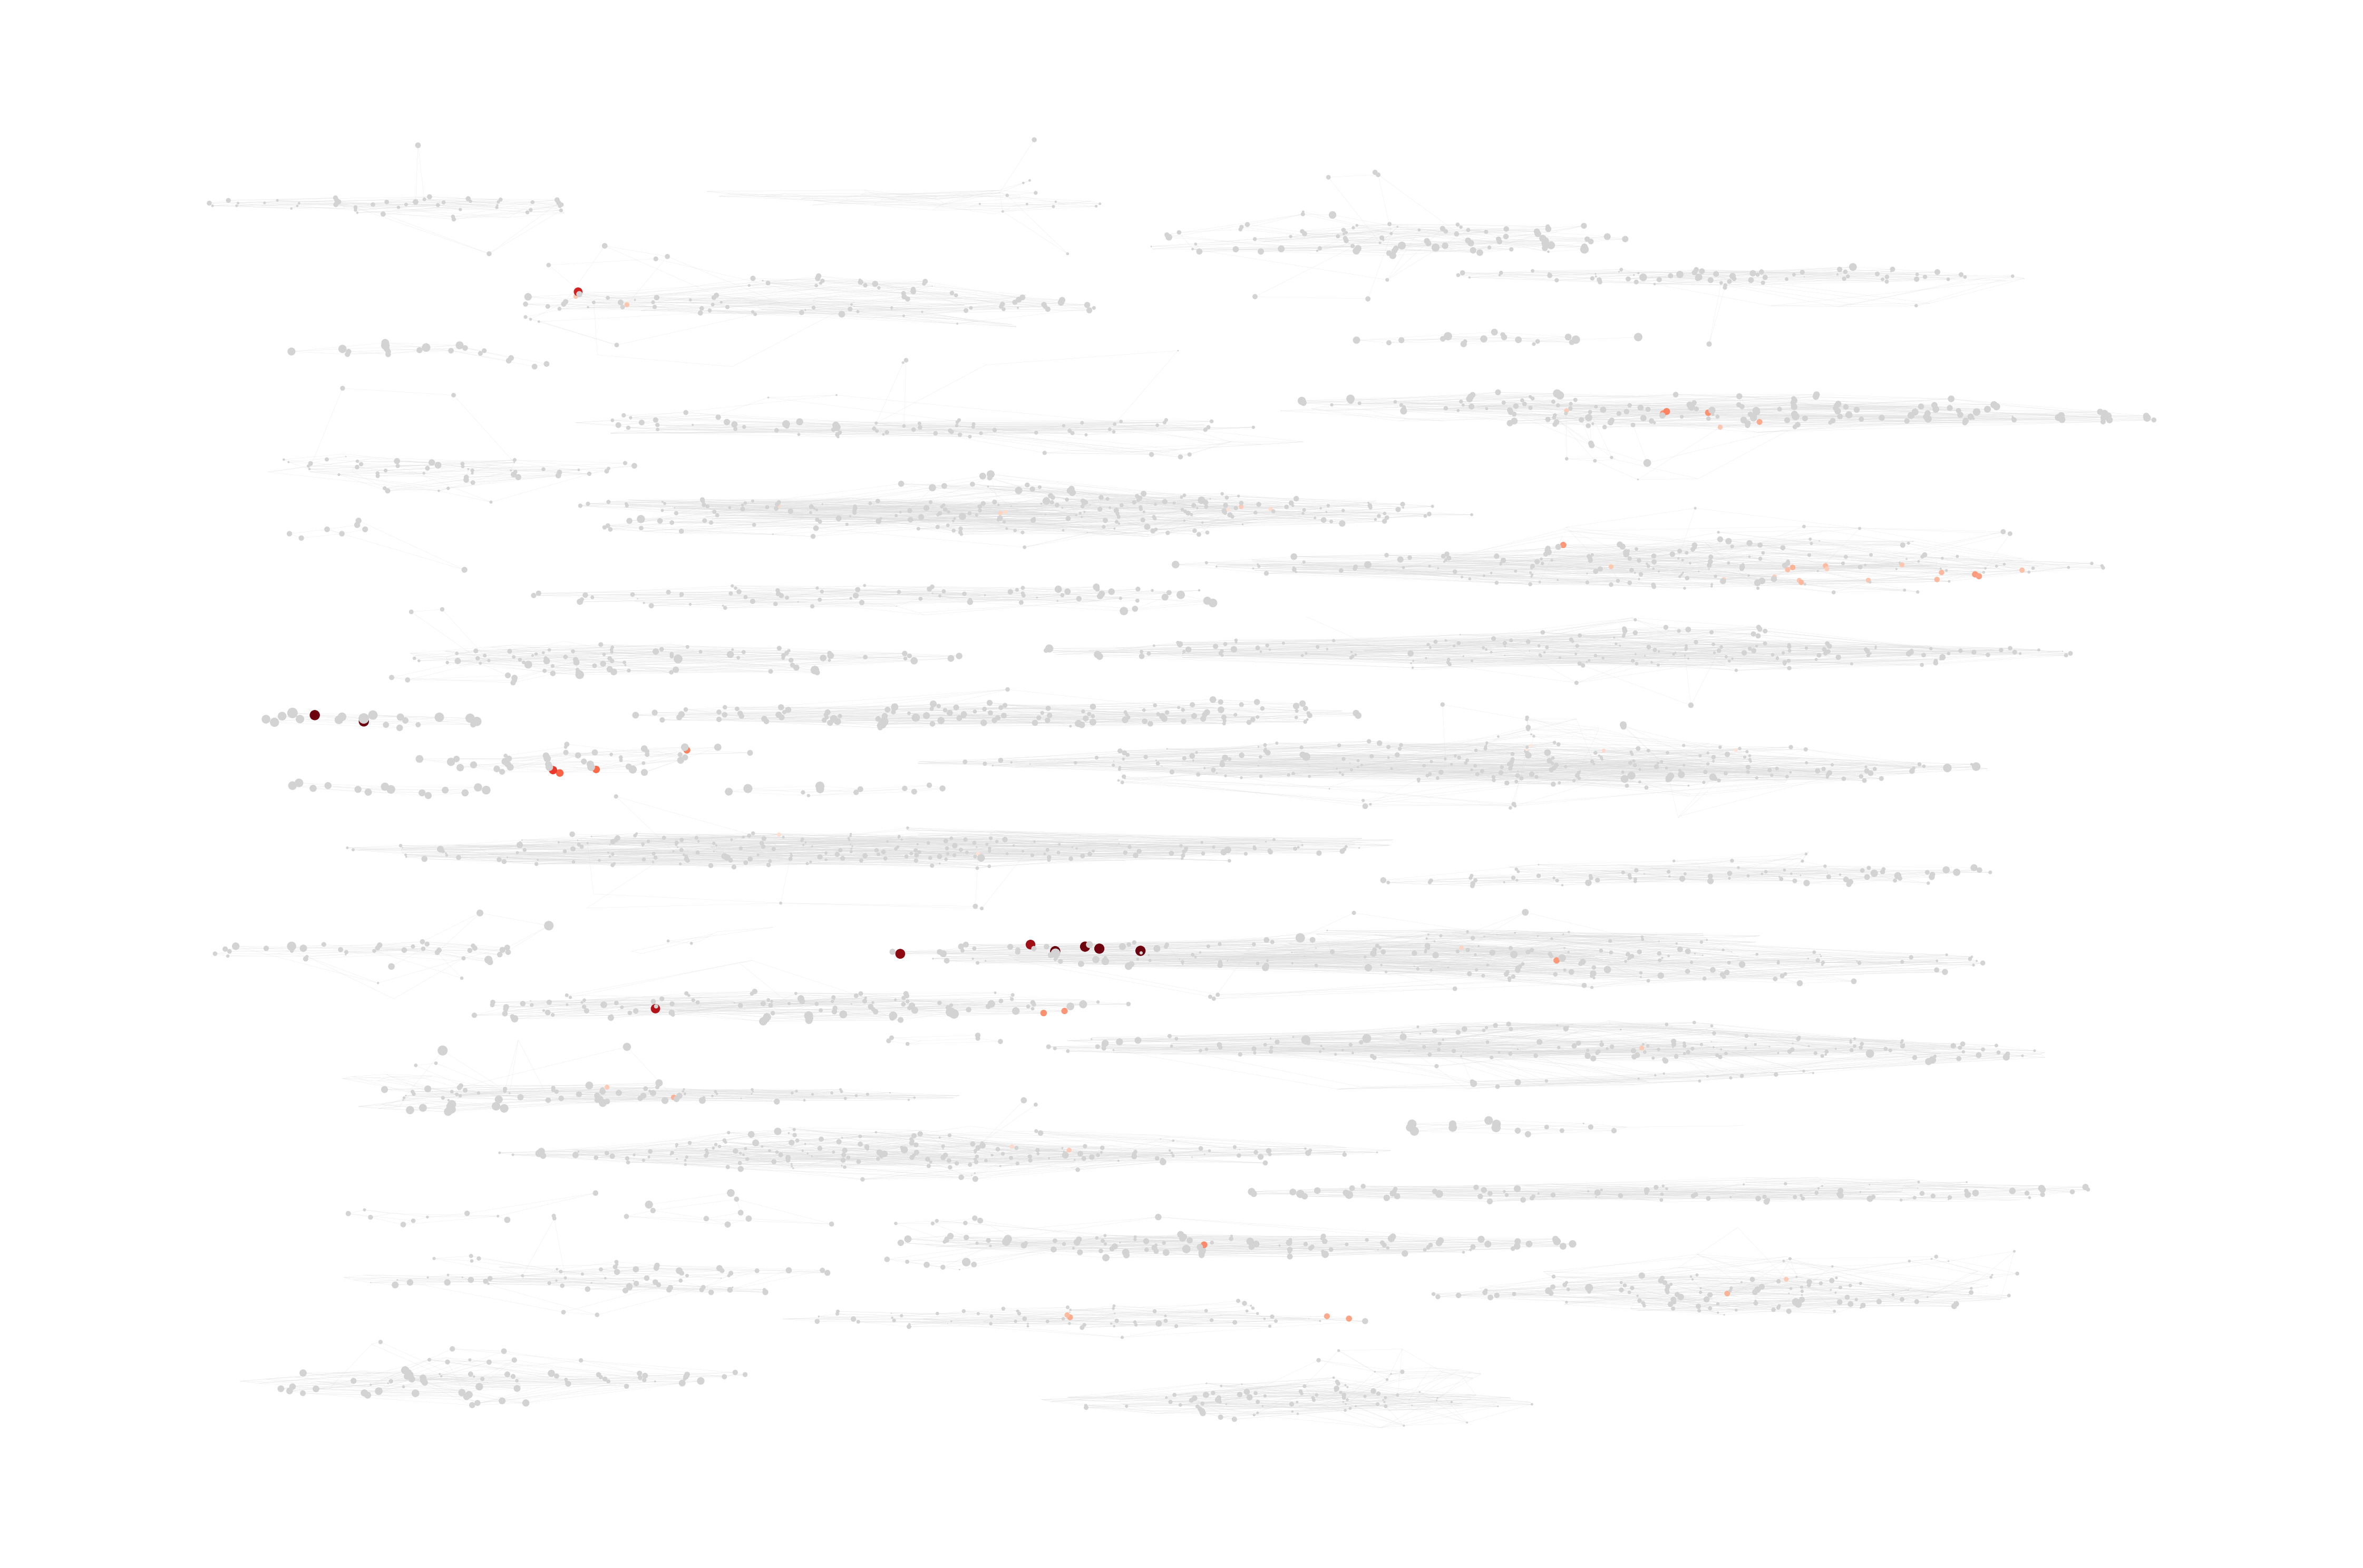

In [375]:
fig, ax = plt.subplots(1, figsize = (60, 40))
nx.draw(dg, with_labels=False, ax = ax, pos = pos, arrows = False, edge_color = 'gainsboro',
        node_size = node_size * 100, node_color = node_colors, width = 0.2)
# fig.savefig('data/cwas-results/test-tad-boundary-tree.png', bbox_inches = 'tight')